<a href="https://colab.research.google.com/github/mart1428/TimeSeriesForecasting/blob/main/TimeSeriesForecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GDrive Mounting for Data Access**

Data are collected from Kaggle Store Sales - Time Series Forecasting Competition.
Here's the link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/overview

**Context (Collected from Kaggle)**

Forecasts aren’t just for meteorologists. Governments forecast economic growth. Scientists attempt to predict the future population. And businesses forecast product demand—a common task of professional data scientists. Forecasts are especially relevant to brick-and-mortar grocery stores, which must dance delicately with how much inventory to buy. Predict a little over, and grocers are stuck with overstocked, perishable goods. Guess a little under, and popular items quickly sell out, leading to lost revenue and upset customers. More accurate forecasting, thanks to machine learning, could help ensure retailers please customers by having just enough of the right products at the right time.

Current subjective forecasting methods for retail have little data to back them up and are unlikely to be automated. The problem becomes even more complex as retailers add new locations with unique needs, new products, ever-transitioning seasonal tastes, and unpredictable product marketing.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Library Imports**

Main Package:


*   XGBoost
*   statsmodel.tsa.deterministic
*   sklearn.linear_model
*   sklearn.metrics
*   pandas



In [ ]:
from xgboost import XGBRegressor
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

In [ ]:
stores = pd.read_csv('/content/drive/MyDrive/Portfolio/TimeSeriesForecasting/stores.csv')
train = pd.read_csv('/content/drive/MyDrive/Portfolio/TimeSeriesForecasting/train.csv', parse_dates =['date'])
test = pd.read_csv('/content/drive/MyDrive/Portfolio/TimeSeriesForecasting/test.csv', parse_dates = ['date'])

**Below is the overview of the data:**

In [ ]:
print(stores.head(5))
print(train.head(5))
print(test.head(5))

   store_nbr           city                           state type  cluster
0          1          Quito                       Pichincha    D       13
1          2          Quito                       Pichincha    D       13
2          3          Quito                       Pichincha    D        8
3          4          Quito                       Pichincha    D        9
4          5  Santo Domingo  Santo Domingo de los Tsachilas    D        4
   id       date  store_nbr      family  sales  onpromotion
0   0 2013-01-01          1  AUTOMOTIVE    0.0            0
1   1 2013-01-01          1   BABY CARE    0.0            0
2   2 2013-01-01          1      BEAUTY    0.0            0
3   3 2013-01-01          1   BEVERAGES    0.0            0
4   4 2013-01-01          1       BOOKS    0.0            0
        id       date  store_nbr      family  onpromotion
0  3000888 2017-08-16          1  AUTOMOTIVE            0
1  3000889 2017-08-16          1   BABY CARE            0
2  3000890 2017-08-16 

In [ ]:
stores_train = pd.merge(left = stores, right = train, left_on = 'store_nbr', right_on = 'store_nbr')
print(stores_train.columns)

Index(['store_nbr', 'city', 'state', 'type', 'cluster', 'id', 'date', 'family',
       'sales', 'onpromotion'],
      dtype='object')


In [ ]:
stores_test = pd.merge(left = stores, right = test, on = ['store_nbr'])

trainAndTest = pd.concat([stores_train, stores_test], axis = 0)
trainAndTest.fillna(0, inplace = True)
print(trainAndTest.head())
print(trainAndTest.tail())

   store_nbr   city      state type  cluster  id       date      family  \
0          1  Quito  Pichincha    D       13   0 2013-01-01  AUTOMOTIVE   
1          1  Quito  Pichincha    D       13   1 2013-01-01   BABY CARE   
2          1  Quito  Pichincha    D       13   2 2013-01-01      BEAUTY   
3          1  Quito  Pichincha    D       13   3 2013-01-01   BEVERAGES   
4          1  Quito  Pichincha    D       13   4 2013-01-01       BOOKS   

   sales  onpromotion  
0    0.0            0  
1    0.0            0  
2    0.0            0  
3    0.0            0  
4    0.0            0  
       store_nbr       city   state type  cluster       id       date  \
28507         54  El Carmen  Manabi    C        3  3029263 2017-08-31   
28508         54  El Carmen  Manabi    C        3  3029264 2017-08-31   
28509         54  El Carmen  Manabi    C        3  3029265 2017-08-31   
28510         54  El Carmen  Manabi    C        3  3029266 2017-08-31   
28511         54  El Carmen  Manabi    C

# **Version 1**

Run the code below to create a forecast and plot on each store total sales.

The steps in creating the forecast are:

1. Use DeterministicProcess to get the TimeIndex (X_axis) then split it to train and test, which will then be used for XGBoost
2. Use CalendarFourier to include the seasonality
3. Fit the train data using LinearRegression
4. Find y_residuals
5. Use XGBRegressor to learn the pattern of y_residuals
6. Predict the test data using the fitted LinearRegression and XGBRegressor
7. Add both of the results.  

MAD: 2655.384022579079, MSE: 12427096.412052266, MAPE: 1.2576794803932098e+17


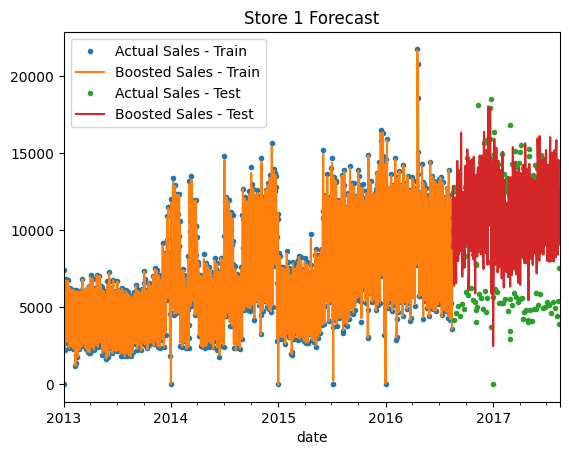

MAD: 3772.626284644058, MSE: 20873669.952879578, MAPE: 2.3485794813296506e+17


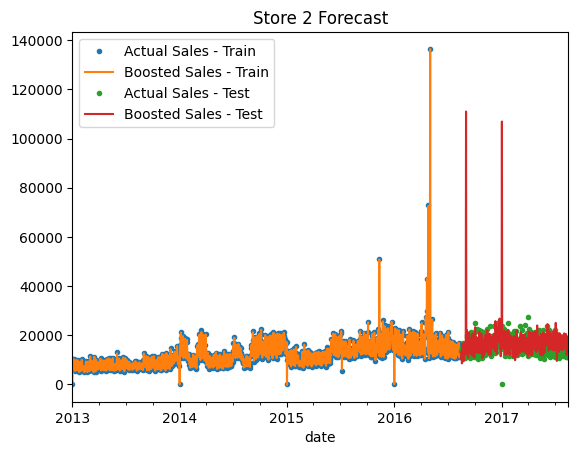

MAD: 8063.969634487881, MSE: 92919647.28264444, MAPE: 5.271612142242292e+17


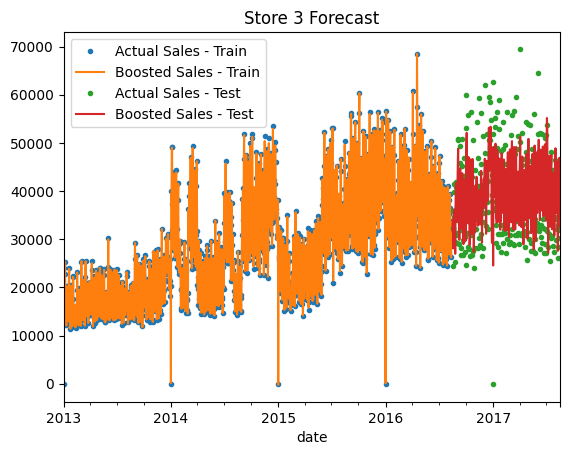

MAD: 3172.205269603848, MSE: 14546701.710431503, MAPE: 2.115615772379665e+17


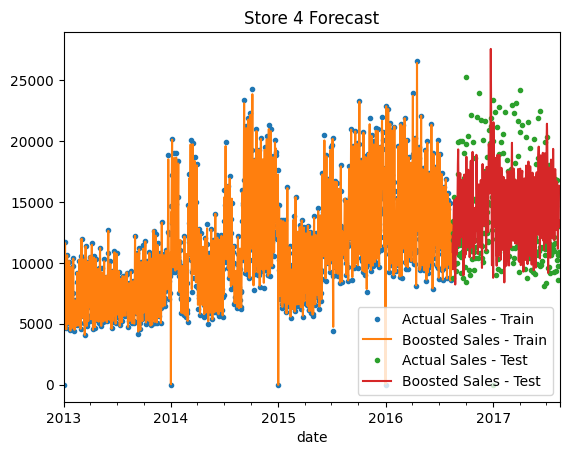

MAD: 1646.2632779190458, MSE: 4265345.75884443, MAPE: 1.6905080750348086e+17


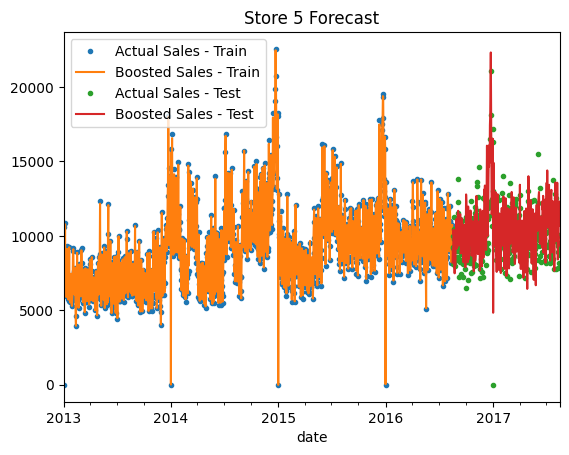

MAD: 4483.395669323154, MSE: 27351332.697555333, MAPE: 2.7653946048521757e+17


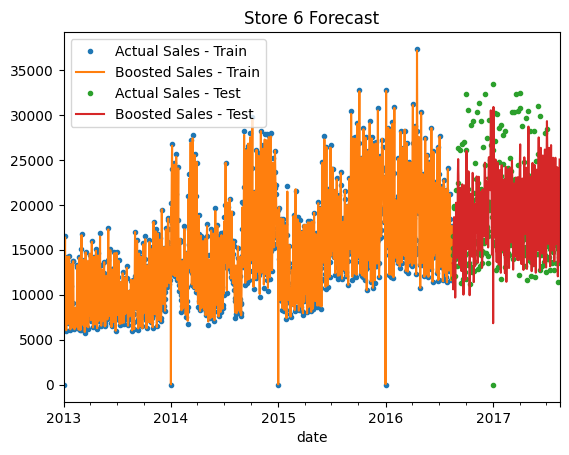

MAD: 3541.9592867864967, MSE: 19233993.142345354, MAPE: 2.4903558832280934e+17


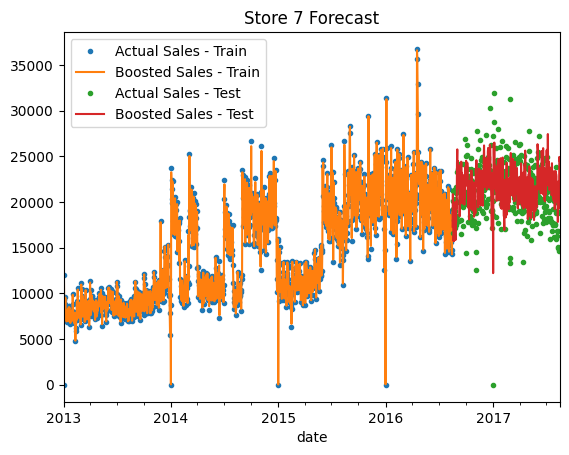

MAD: 4719.389623829564, MSE: 32401500.74080529, MAPE: 3.1051034399395834e+17


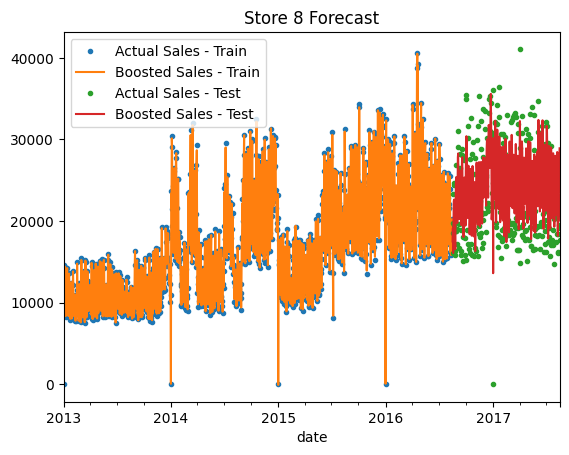

MAD: 4604.570397062249, MSE: 30621802.20931302, MAPE: 2.70715689599123e+17


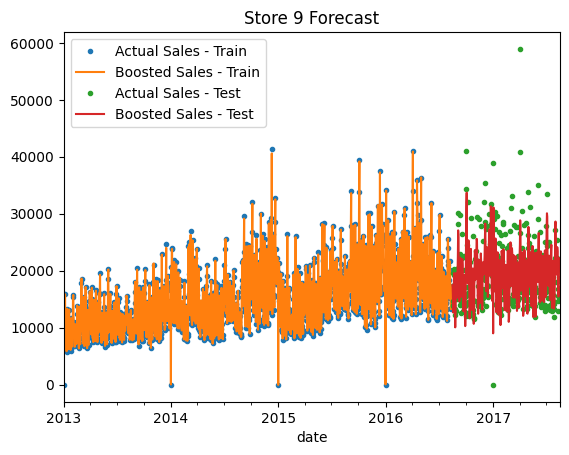

MAD: 1301.538466504632, MSE: 2303307.6941585545, MAPE: 8.711292894411589e+16


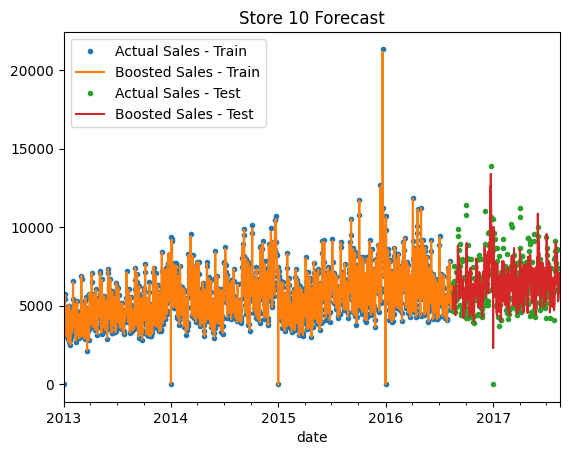

MAD: 3105.965931984426, MSE: 14840330.952893114, MAPE: 2.7974143287082685e+17


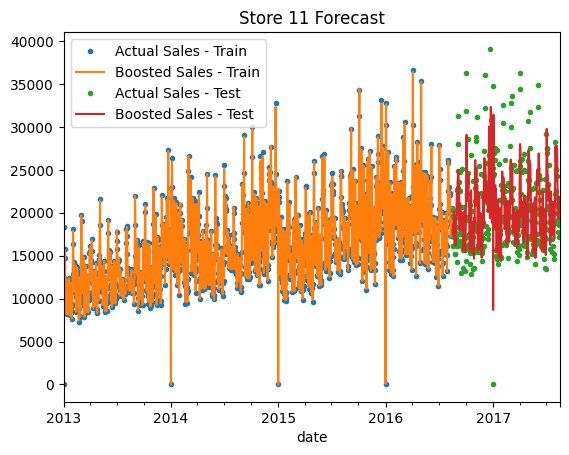

MAD: 1165.9459023001446, MSE: 2361781.1953773275, MAPE: 9.825530294184013e+16


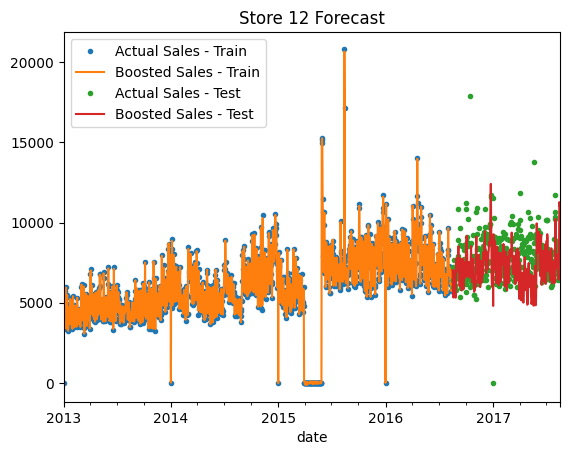

MAD: 1806.438169355998, MSE: 4125566.8380455114, MAPE: 1.0577918834233365e+17


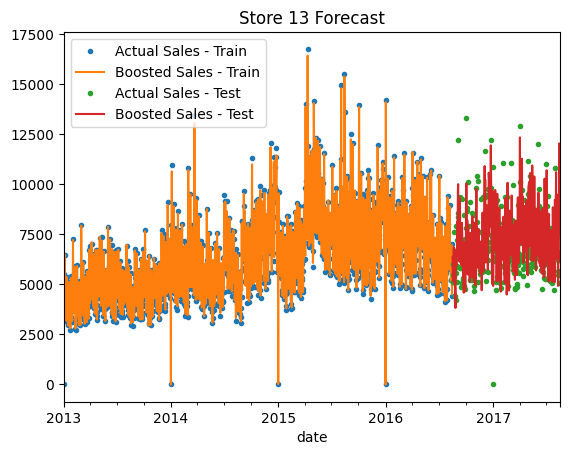

MAD: 1534.9856220400322, MSE: 3867593.310921305, MAPE: 1.1128822523274618e+17


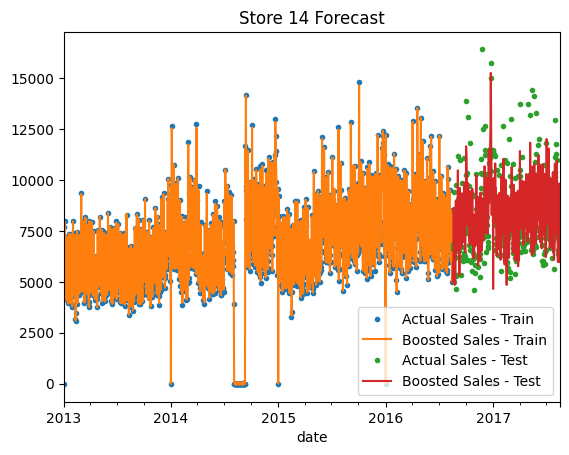

MAD: 1169.1863232046, MSE: 2136526.008602322, MAPE: 1.0182399389528942e+17


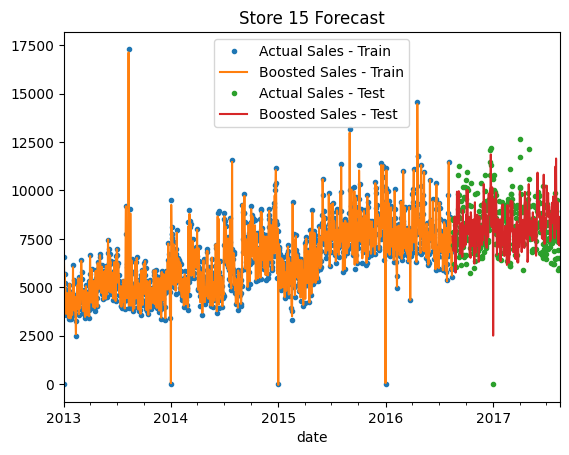

MAD: 1861.0645518379092, MSE: 4920120.385050058, MAPE: 9.526981998922274e+16


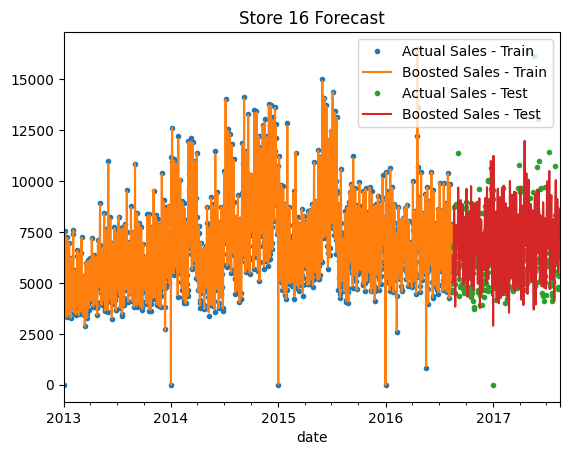

MAD: 3062.459251767508, MSE: 13513176.4154049, MAPE: 1.9283868940999936e+17


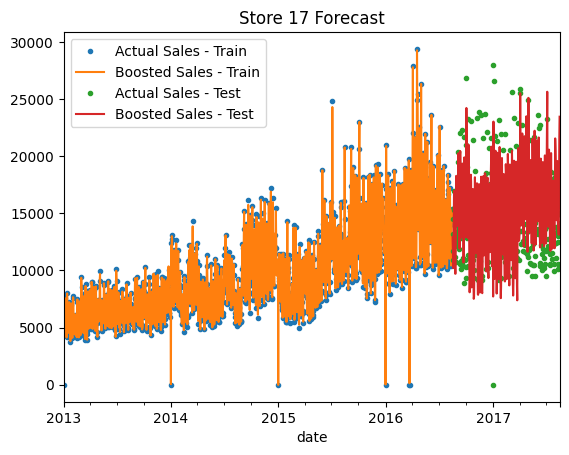

MAD: 5488.778339356129, MSE: 50045304.58480711, MAPE: 1.6019591987434002e+19


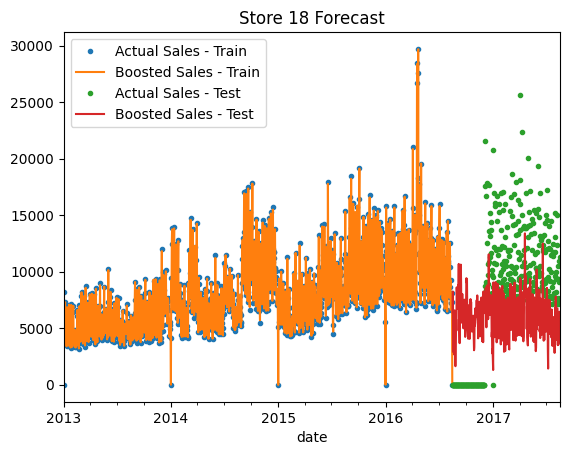

MAD: 2668.62261844008, MSE: 8728217.806007734, MAPE: 1.5056304417455946e+17


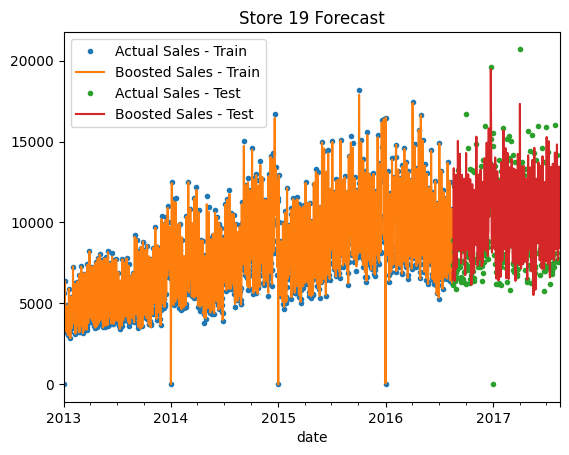

MAD: 5742.593471041091, MSE: 46631400.996511206, MAPE: 2.3188187751892592e+17


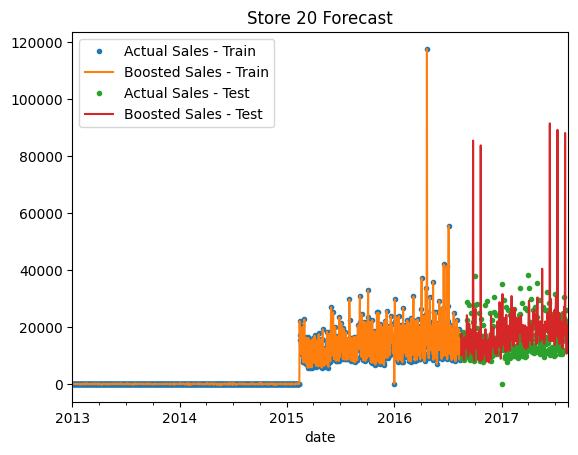

MAD: 3069.3474856513662, MSE: 14480573.399649834, MAPE: 1.7282880907249942e+17


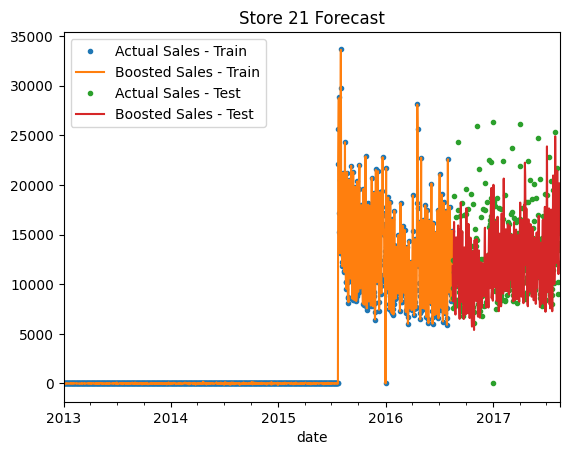

MAD: 1545.4725384218266, MSE: 4010655.124143099, MAPE: 7.23540171815818e+16


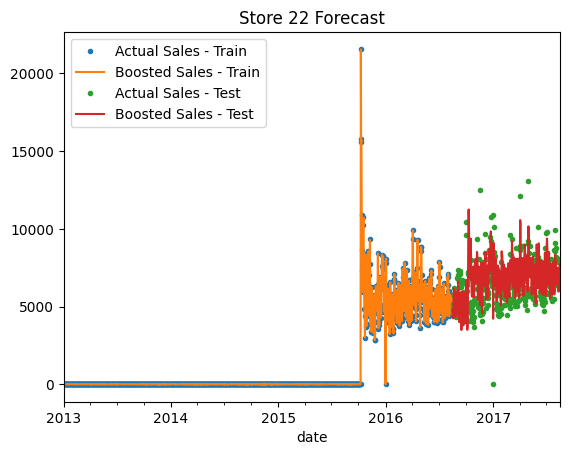

MAD: 841.4551677584745, MSE: 1286470.9680104596, MAPE: 1.1065395570797064e+17


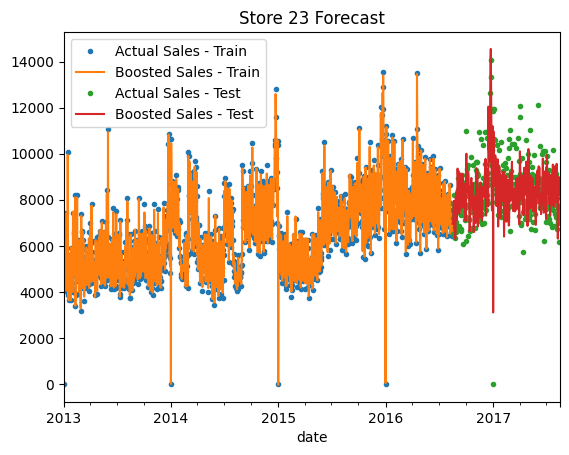

MAD: 3393.4097295897855, MSE: 18839667.150016014, MAPE: 2.5820214514981482e+17


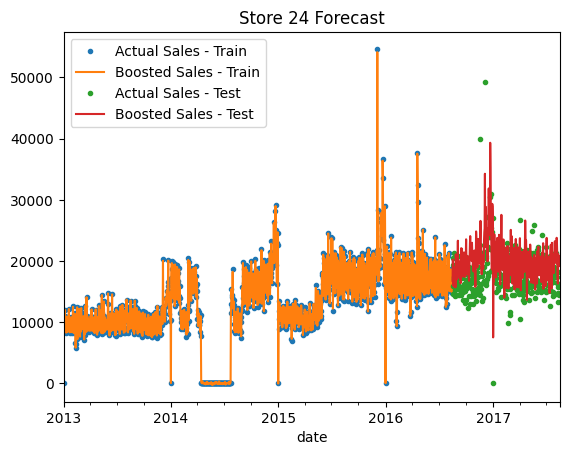

MAD: 3601.831256829669, MSE: 25844368.08251497, MAPE: 6.376345236282063e+18


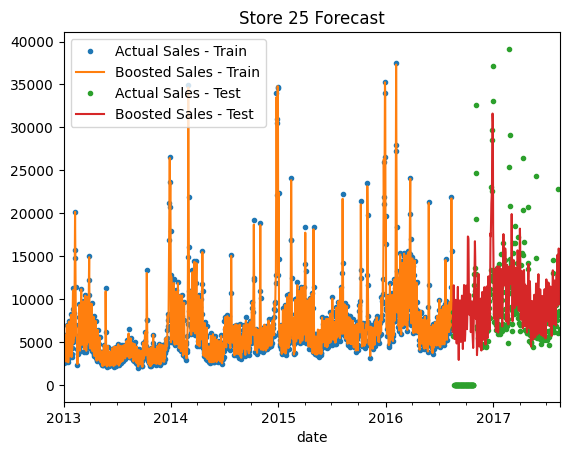

MAD: 1310.0064419225282, MSE: 4068328.4068338615, MAPE: 1.1148319912799814e+17


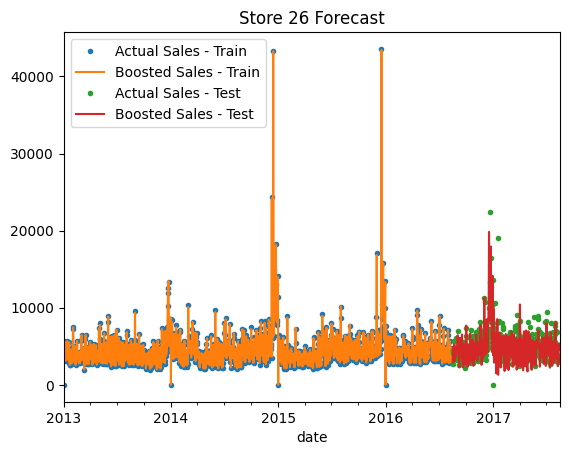

MAD: 3394.752897563667, MSE: 16296996.650519563, MAPE: 2.1504315815659552e+17


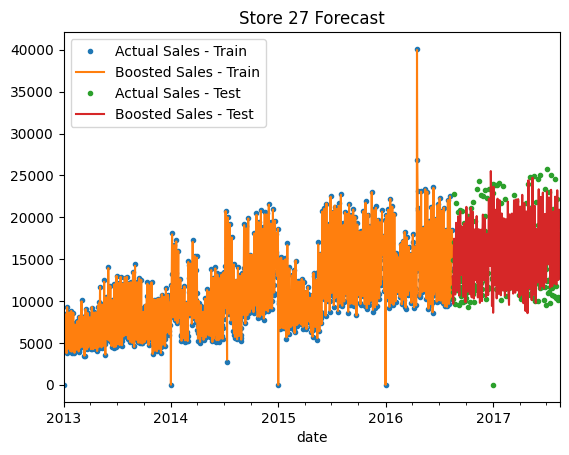

MAD: 3805.8184243884607, MSE: 20549662.091751676, MAPE: 2.2710961286903994e+17


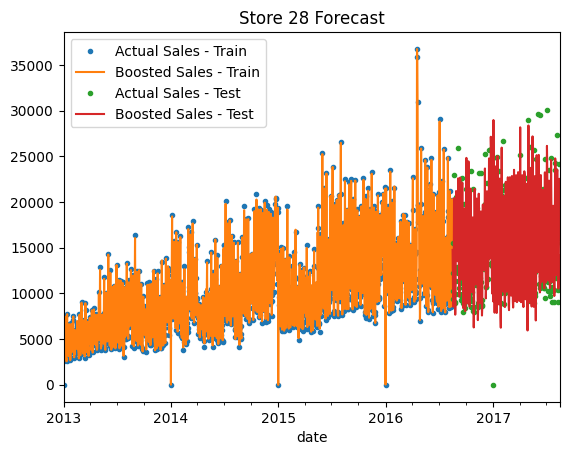

MAD: 2924.9468636897645, MSE: 13294003.330080198, MAPE: 1.756232133087121e+17


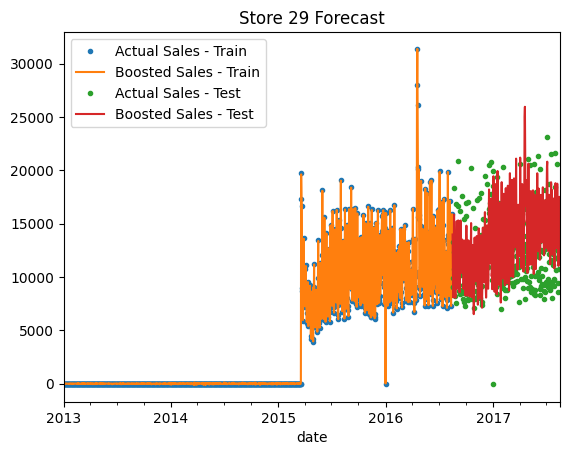

MAD: 1155.1069269500372, MSE: 2511157.440970253, MAPE: 8.094632193322651e+16


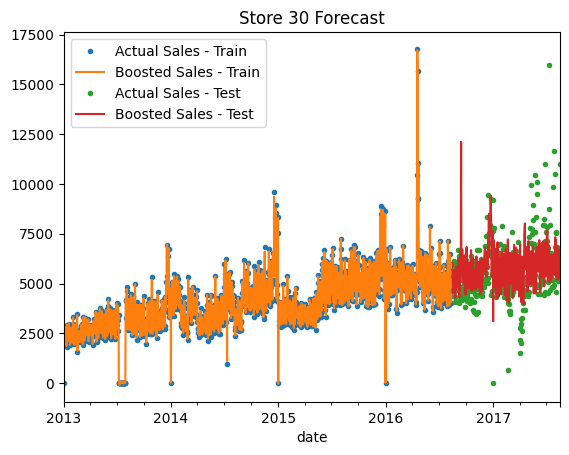

MAD: 2612.424871336595, MSE: 10992585.993915616, MAPE: 2.582912318907172e+17


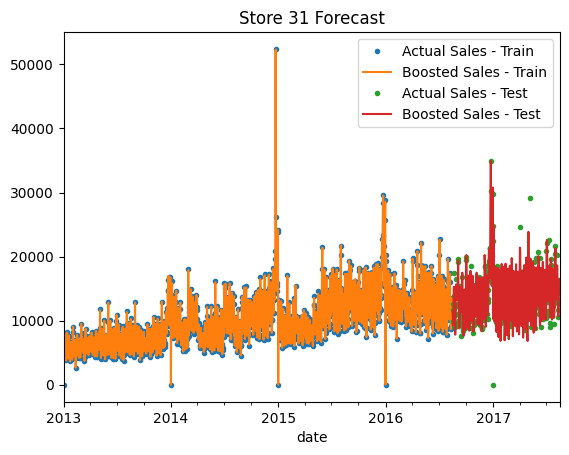

MAD: 1066.2294814183726, MSE: 5140171.0284313215, MAPE: 6.9415440723350104e+16


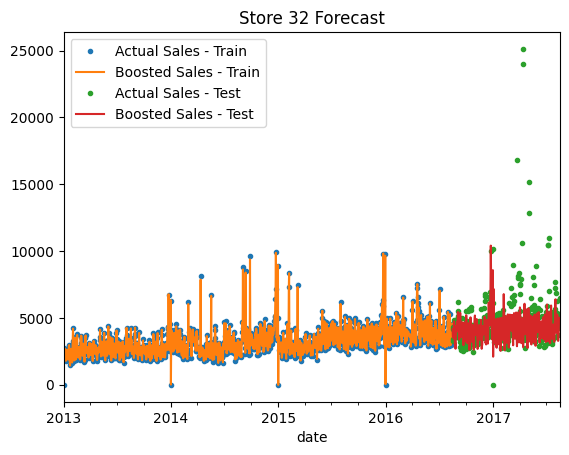

MAD: 2197.9014112077452, MSE: 7086155.914397095, MAPE: 1.6956093171457603e+17


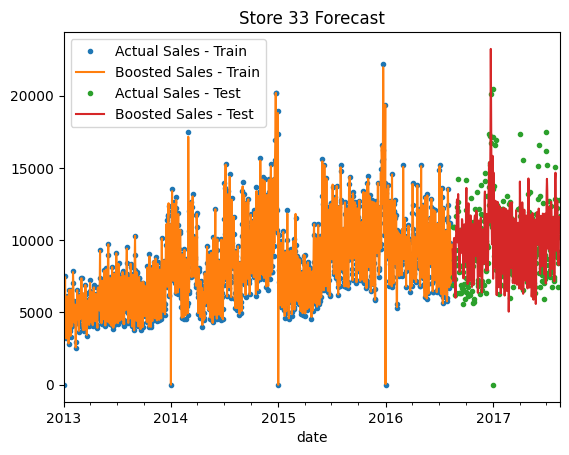

MAD: 1626.7501163942795, MSE: 4476827.285330258, MAPE: 1.6492444863296182e+17


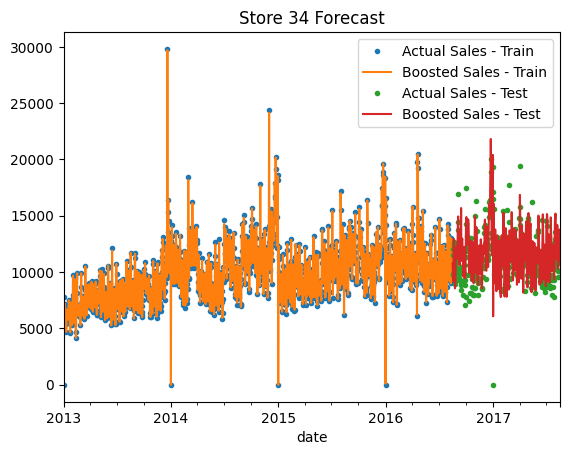

MAD: 1528.533609068192, MSE: 5692899.1712876065, MAPE: 1.0126014723098454e+17


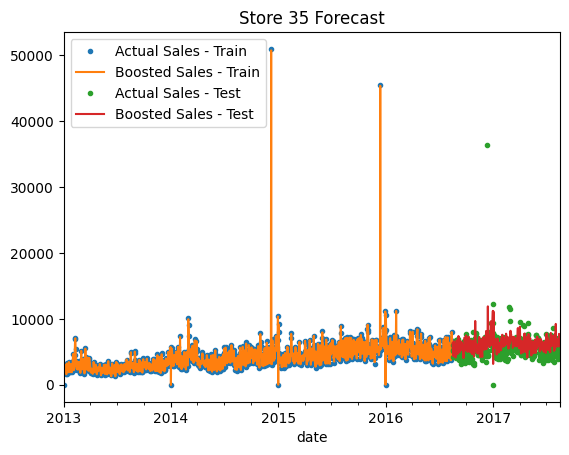

MAD: 3731.525243251707, MSE: 18458082.579907484, MAPE: 2.3985296854948438e+17


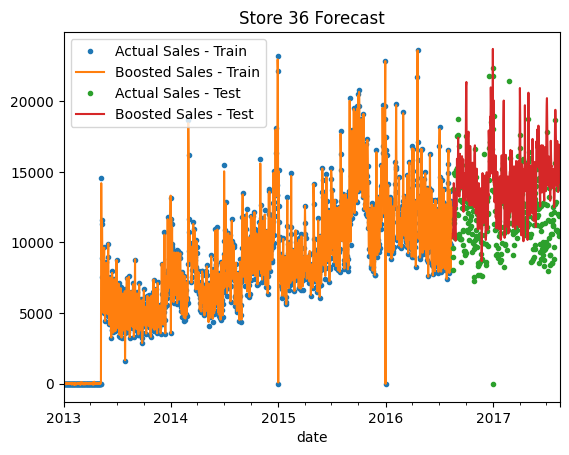

MAD: 2359.9549212086195, MSE: 8695617.564903859, MAPE: 1.8502521415995082e+17


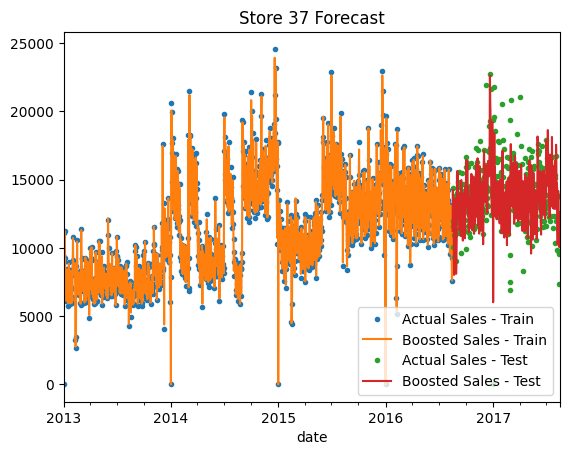

MAD: 3273.40569816383, MSE: 15259606.927843718, MAPE: 1.97002569871945e+17


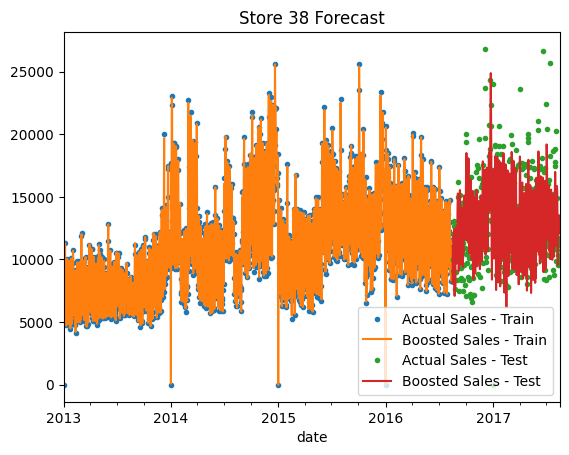

MAD: 3086.371103996716, MSE: 33135879.924431063, MAPE: 2.1128575236392848e+17


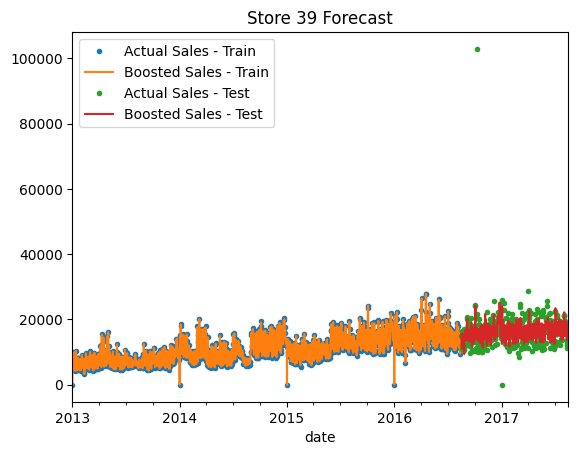

MAD: 2594.7900490788975, MSE: 10282804.866726039, MAPE: 2.0349935453654595e+17


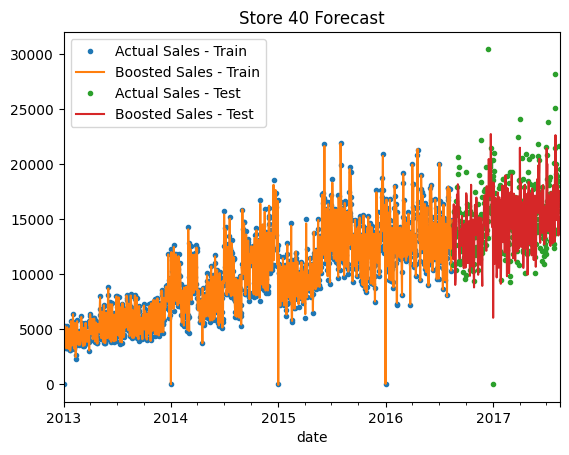

MAD: 2426.2115096269445, MSE: 9077585.63061237, MAPE: 1.825975142695809e+17


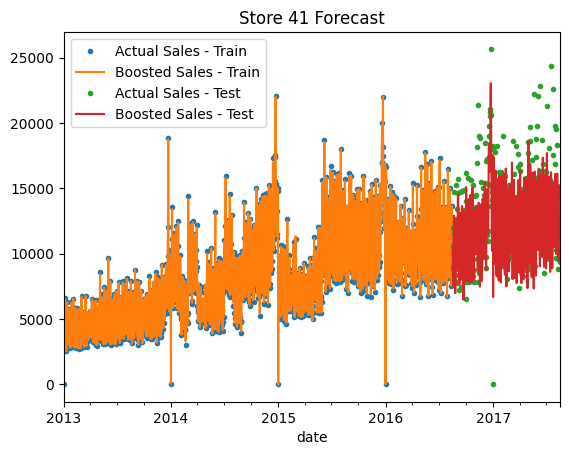

MAD: 2568.9230132149155, MSE: 10751821.213450288, MAPE: 1.6441638951555274e+17


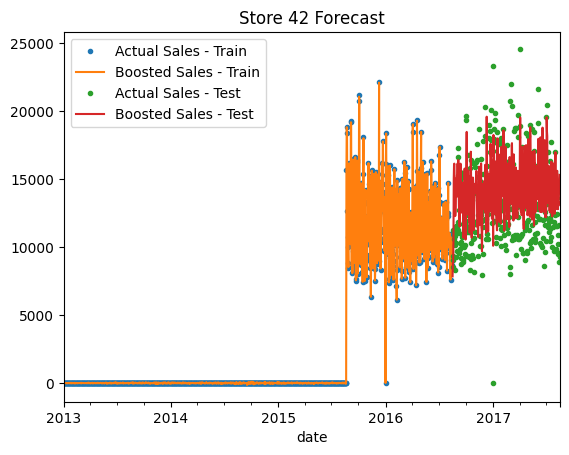

MAD: 2565.4522234948645, MSE: 12260077.730915032, MAPE: 7.84009966070891e+17


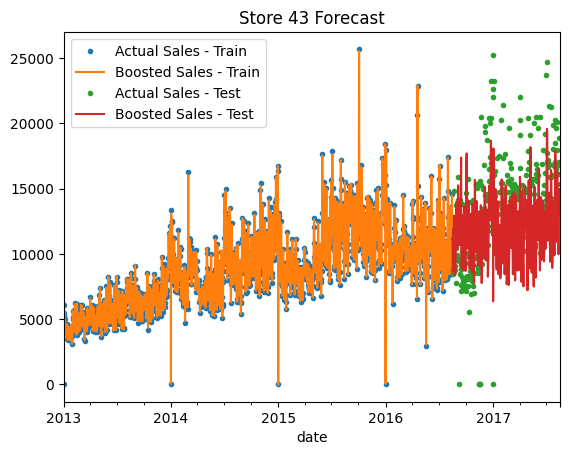

MAD: 11206.867247402826, MSE: 174736736.04394054, MAPE: 6.275597005672562e+17


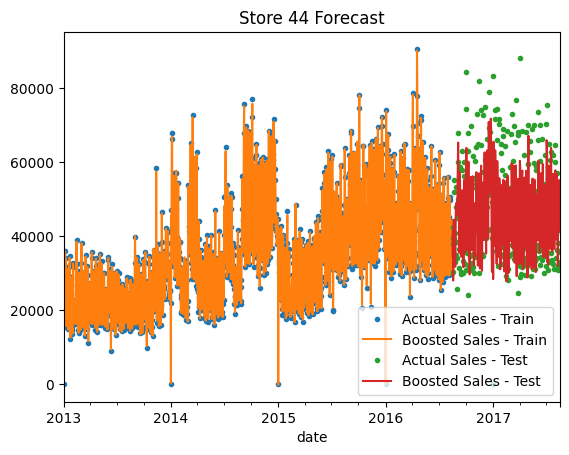

MAD: 9954.843208393135, MSE: 142534297.38826206, MAPE: 6.20417547142511e+17


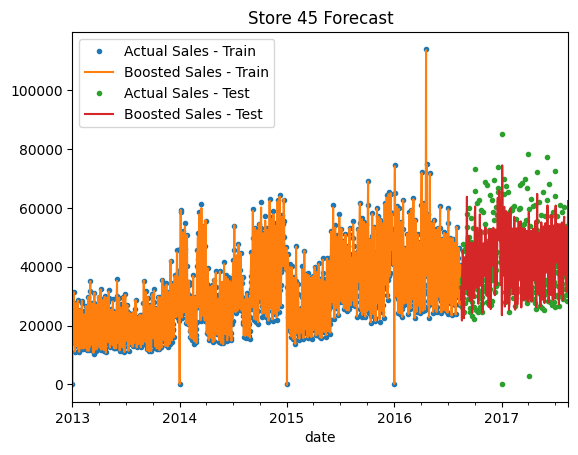

MAD: 8764.513558536699, MSE: 113566267.06498177, MAPE: 4.824414253481531e+17


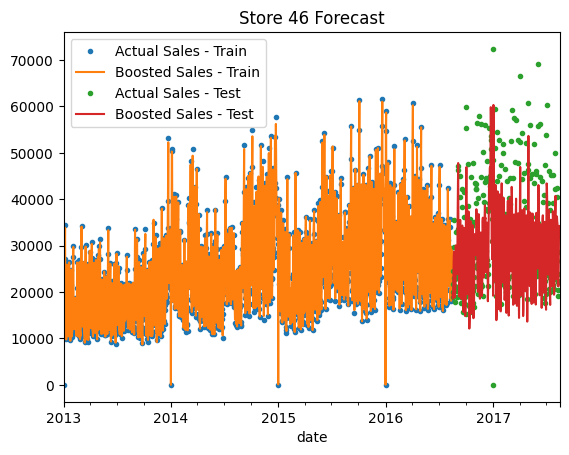

MAD: 9364.750885803667, MSE: 123360139.56146781, MAPE: 5.627308899910235e+17


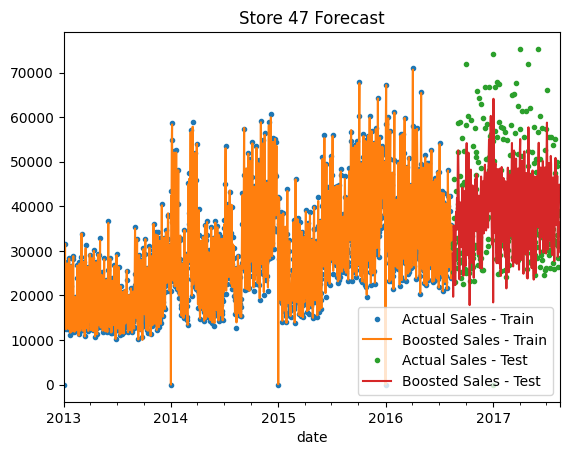

MAD: 8653.968468002344, MSE: 100737914.04544346, MAPE: 4.185468767128524e+17


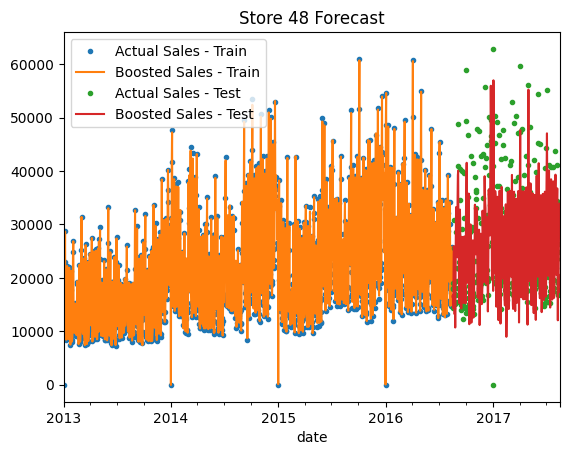

MAD: 6821.9705897425965, MSE: 70786510.98358448, MAPE: 5.0860163567328506e+17


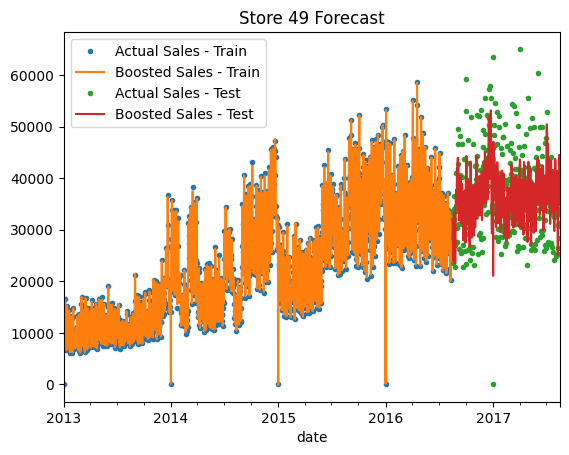

MAD: 4442.950829069873, MSE: 29158847.252082087, MAPE: 2.9186774333635296e+17


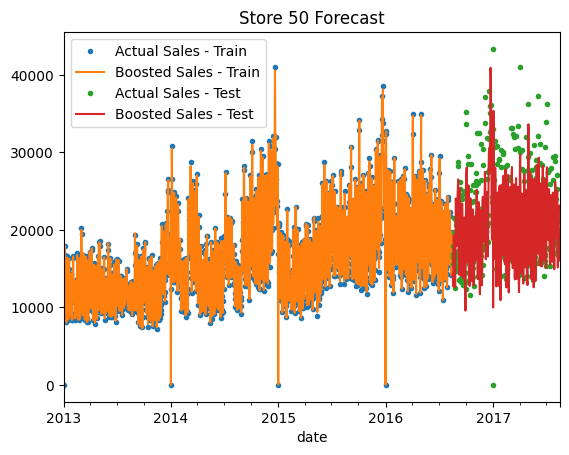

MAD: 4575.901747071462, MSE: 32094135.617830493, MAPE: 3.1728346633263866e+17


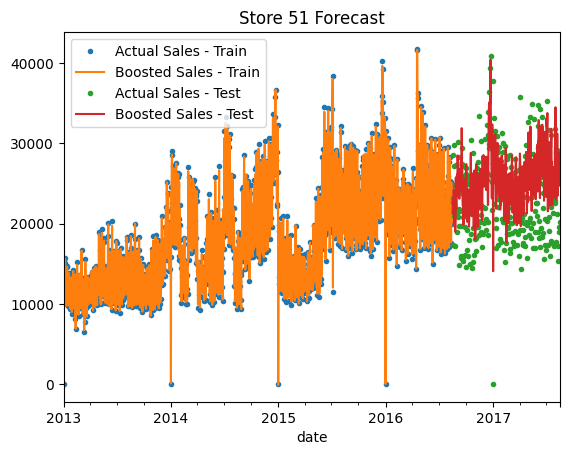

MAD: 7407.059706728021, MSE: 177474181.47110802, MAPE: 0.3241758241758242


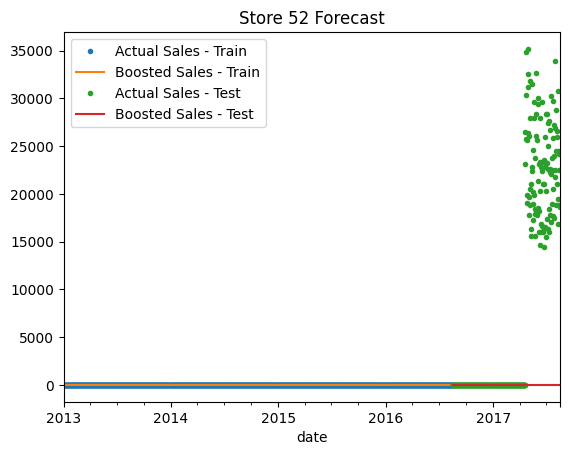

MAD: 3608.8310585780964, MSE: 21189467.99236251, MAPE: 2.236924940474592e+17


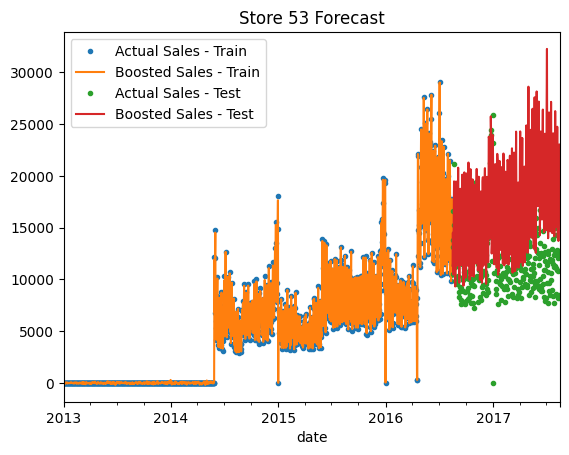

MAD: 2001.6752741098546, MSE: 7498607.461369973, MAPE: 1.2186424517464325e+17


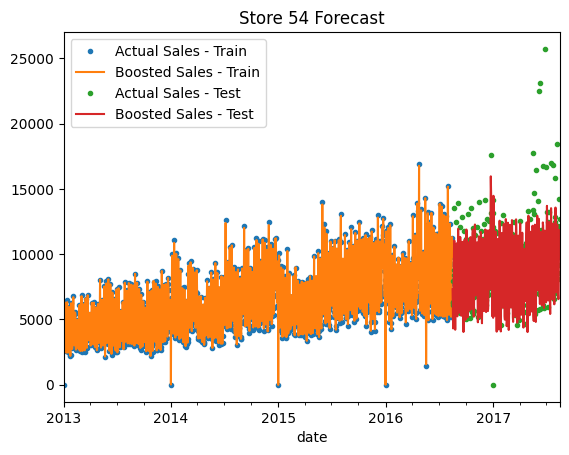

In [ ]:
store_list = stores[['store_nbr']].drop_duplicates()
dateRange = train[['date']].drop_duplicates()
fourier = CalendarFourier(freq = 'A', order = 52)

for index, row in store_list[['store_nbr']].iterrows():
    storeData = stores_train[stores_train['store_nbr'] == row['store_nbr']][['date', 'cluster', 'sales']].groupby('date').sum()
    storeData = storeData.to_period('D')


    dp = DeterministicProcess(
        index = storeData.index,
        seasonal = True,
        additional_terms = [fourier],
        drop = True,
        constant = True,
        order = 1,
    )
    X = dp.in_sample()

    x_train, x_test = X.loc['2013-01-01':'2016-08-15'], X.loc['2016-08-16':]
    y_train, y_test = storeData[['sales']].loc['2013-01-01' : '2016-08-15', 'sales'], storeData[['sales']].loc['2016-08-16':,'sales']


    model = LinearRegression(fit_intercept = False).fit(x_train, y_train)

    y_fit = pd.Series(model.predict(x_train), index = x_train.index)
    y_pred = pd.Series(model.predict(x_test), index = x_test.index)

    y_resid = y_train - y_fit

    xgb = XGBRegressor().fit(x_train, y_resid)
    y_fit_boosted = xgb.predict(x_train) + y_fit
    y_pred_boosted = xgb.predict(x_test) + y_pred

    mad = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'MAD: {mad}, MSE: {mse}, MAPE: {mape}')


    ax = y_train.plot(x = x_train, y = y_train, style = '.', label = 'Actual Sales - Train')
    ax = y_fit_boosted.plot(ax = ax, label = 'Boosted Sales - Train')
    ax = y_test.plot(x = x_test, y = y_test, style = '.', label = 'Actual Sales - Test')
    ax = y_pred_boosted.plot(ax = ax, label = 'Boosted Sales - Test')

    store_nbr = row['store_nbr']
    ax.set_title(f'Store {store_nbr} Forecast')
    plt.legend()
    plt.show()



In [ ]:
final = test.copy()
final['sales'] = 0
print(final)

            id       date  store_nbr                      family  onpromotion  \
0      3000888 2017-08-16          1                  AUTOMOTIVE            0   
1      3000889 2017-08-16          1                   BABY CARE            0   
2      3000890 2017-08-16          1                      BEAUTY            2   
3      3000891 2017-08-16          1                   BEVERAGES           20   
4      3000892 2017-08-16          1                       BOOKS            0   
...        ...        ...        ...                         ...          ...   
28507  3029395 2017-08-31          9                     POULTRY            1   
28508  3029396 2017-08-31          9              PREPARED FOODS            0   
28509  3029397 2017-08-31          9                     PRODUCE            1   
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9   
28511  3029399 2017-08-31          9                     SEAFOOD            0   

       sales  
0          0

Using the same method to forecast the total sales of each store above, I used it to forecast the total sales on every store and every 'family'

In [ ]:
store_list = trainAndTest[['store_nbr']].drop_duplicates()
family_list = trainAndTest[['family']].drop_duplicates()

fourier = CalendarFourier(freq = 'A', order = 10)

predCombine = pd.DataFrame({'date':[], 'store_nbr': [], 'family':[], 'sales':[]})
for idx, row in store_list.iterrows():
  store_nbr = row['store_nbr']

  for i, r in family_list.iterrows():
    fam = r['family']

    dataTemp = trainAndTest[(trainAndTest['store_nbr'] == store_nbr) & (trainAndTest['family'] == fam)]
    dataTemp = dataTemp.set_index('date').to_period('D')


    dp = DeterministicProcess(
        index = dataTemp.index,
        drop = True,
        constant = True,
        order = 1,
        seasonal = True,
        additional_terms= [fourier]
    )

    X = dp.in_sample()

    x_train, x_test = X.loc['2013-01-01': '2017-08-15'], X.loc['2017-08-16':]
    y_train = dataTemp.loc['2013-01-01': '2017-08-15', 'sales']

    model = LinearRegression(fit_intercept = False).fit(x_train, y_train)

    y_fit = pd.Series(model.predict(x_train), index = x_train.index)

    y_resid = y_train - y_fit


    xgb =  XGBRegressor().fit(x_train, y_resid)

    y_pred = pd.Series(model.predict(x_test))


    y_fit_boosted = xgb.predict(x_train) + y_fit
    y_pred_boosted = xgb.predict(x_test) + y_pred

    pred = pd.DataFrame(y_pred_boosted, columns = ['sales'])
    pred.loc[pred['sales'] < 1] = 0
    pred['date'] = x_test.index
    pred['store_nbr'] = store_nbr
    pred['family'] = fam

    predCombine = pd.concat([predCombine,pred], axis = 0)


In [ ]:
print(predCombine.head(20))

          date  store_nbr      family     sales
0   2017-08-16        1.0  AUTOMOTIVE  2.792254
1   2017-08-17        1.0  AUTOMOTIVE  4.190415
2   2017-08-18        1.0  AUTOMOTIVE  9.278599
3   2017-08-19        1.0  AUTOMOTIVE  5.893405
4   2017-08-20        1.0  AUTOMOTIVE  2.766304
5   2017-08-21        1.0  AUTOMOTIVE  5.233096
6   2017-08-22        1.0  AUTOMOTIVE  6.169042
7   2017-08-23        1.0  AUTOMOTIVE  4.902591
8   2017-08-24        1.0  AUTOMOTIVE  4.268078
9   2017-08-25        1.0  AUTOMOTIVE  3.107020
10  2017-08-26        1.0  AUTOMOTIVE  3.225150
11  2017-08-27        1.0  AUTOMOTIVE  1.511539
12  2017-08-28        1.0  AUTOMOTIVE  3.808744
13  2017-08-29        1.0  AUTOMOTIVE  4.920019
14  2017-08-30        1.0  AUTOMOTIVE  6.779387
15  2017-08-31        1.0  AUTOMOTIVE  7.808596
0   2017-08-16        1.0   BABY CARE  0.000000
1   2017-08-17        1.0   BABY CARE  0.000000
2   2017-08-18        1.0   BABY CARE  0.000000
3   2017-08-19        1.0   BABY CARE  0

In [ ]:
predCombine.to_csv('predCombine.csv')

Below is the steps taken in creating the submission.csv file

In [ ]:
final = test.copy()
final['store_nbr'] = final['store_nbr'].astype('int')
final['date'] = final['date'].astype('str')
final['family'] = final['family'].astype('str')

predCopy = predCombine.copy()
predCopy['store_nbr'] = predCopy['store_nbr'].astype('int')
predCopy['date'] = predCopy['date'].astype('str')
predCopy['family'] = predCopy['family'].astype('str')

print(final)
print(predCopy)

submission = pd.merge(left = final, right = predCopy, on = ['date', 'store_nbr', 'family'], copy = True)

print(submission)

            id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]
                  date  st

In [ ]:
print(submission.columns)
submission = submission.drop(columns = ['date','store_nbr', 'family', 'onpromotion'])

print(submission)

submission.to_csv('submission.csv', index = False)

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'sales'], dtype='object')
            id        sales
0      3000888     4.548401
1      3000889     0.000000
2      3000890     8.886017
3      3000891  1917.922852
4      3000892     0.000000
...        ...          ...
28507  3029395   395.155273
28508  3029396   120.335091
28509  3029397  1325.300903
28510  3029398    77.504601
28511  3029399    21.531151

[28512 rows x 2 columns]


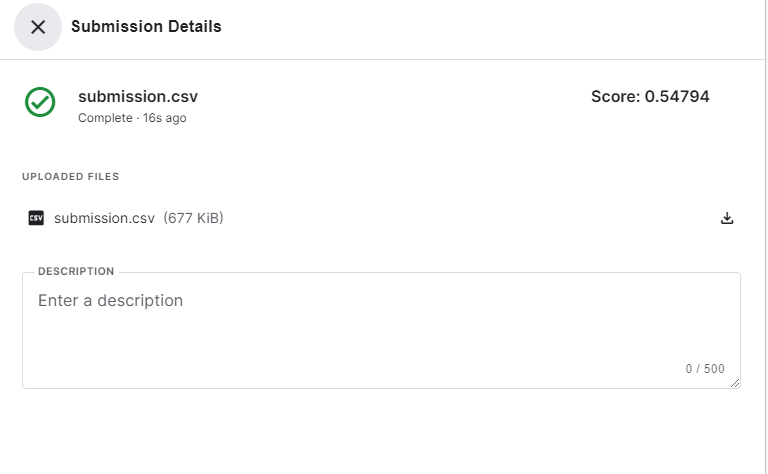

submission with score: 0.54794 details:
  - Used XGBoost to predict the residuals
  - Used Fourier with freq 'A' and order 10 to get the seasonality
  - Used sklearn LinearRegression model to predict overall trend and seasonality


possible next steps:
  - Change the order on fourier
  - Use featur engineering before using xgboost

# **Version 2**

Without any Seasonality and Trend Decomposition, I used XGBRegressor to fit and predict the data. Added 'onpromotion' feature to the model.

In addition to that, I adjusted the XGBRegressor model to have a learning rate of 0.03 and n_estimators (iterations) of 500. Those parameters are the results of fine-tuning to better fit and predict the sales trend and seasonality

In [ ]:
storeList = stores_train['store_nbr'].drop_duplicates()

familyList = stores_train['family'].drop_duplicates()

fourier = CalendarFourier('A', 11)
predCombine = pd.DataFrame({'date':[], 'store_nbr': [], 'family':[], 'sales':[]})
for store in storeList:
  for fam in familyList:

    dataTemp = trainAndTest[(trainAndTest['store_nbr'] == store) & (trainAndTest['family'] == fam)]
    dataTemp = dataTemp.set_index('date').to_period('D')

    dp = DeterministicProcess(
        index = dataTemp.index,
        constant = True,
        order = 1,
        seasonal = True,
        additional_terms = [fourier],
        drop = True
    )

    X = dp.in_sample()
    X['onpromotion'] = dataTemp['onpromotion']
    X['cluster'] = dataTemp['cluster']
    x_train, x_test = X.loc[:'2017-08-15'], X.loc['2017-08-16':]
    y_train = dataTemp[['sales']].loc[:'2017-08-15','sales']


    xgboost = XGBRegressor(learning_rate = 0.03, n_estimators = 500).fit(x_train, y_train)

    y_fit = pd.Series(xgboost.predict(x_train), index = x_train.index)

    y_pred = pd.Series(xgboost.predict(x_test), index = x_test.index)



    # error = mean_squared_log_error(abs(y_test), abs(y_pred))
    # print(f'MSLE: {error}')

    # if error >= 0.5:
    #   dp = DeterministicProcess(
    #       index = dataTemp.index,
    #       constant = True,
    #       order= 1,
    #       drop = True,
    #   )

    #   X = dp.in_sample()
    #   x_train, x_test = X.loc[:'2017-05-15'], X.loc['2017-05-16':'2017-08-15']
    #   y_train, y_test = dataTemp[['sales']].loc[:'2017-05-15','sales'], dataTemp[['sales']].loc['2017-05-16':'2017-08-15', 'sales']
    #   model = LinearRegression().fit(x_train, y_train)

    #   y_fit_linear = pd.Series(model.predict(x_train), index = x_train.index)

    #   y_pred_linear = pd.Series(model.predict(x_test), index = x_test.index)

    #   error2 = mean_squared_log_error(abs(y_test), abs(y_pred_linear))
    #   improved = error > error2
    #   print(f'Improved {improved} MSLE: {error2}')

    # ax = y_train.plot(x= x_train, y = y_train, label = 'Actual', style = '.')
    # ax = y_fit.plot(ax = ax, color = 'orange', label = 'Y Fit')
    # ax = y_pred.plot(ax = ax, label = 'Test' )
    # ax.set_title(f'Store {store}, Family: {fam} Sales')
    # ax.set_xlabel('Date')
    # ax.set_ylabel('Sales')
    # plt.show()


    pred = pd.DataFrame(y_pred, columns = ['sales'])
    pred.loc[pred['sales'] < 1] = 0
    pred['date'] = x_test.index
    pred['store_nbr'] = store

    pred['family'] = fam



    predCombine = pd.concat([predCombine,pred], axis = 0)


In [ ]:
final = test.copy()
final['store_nbr'] = final['store_nbr'].astype('int')
final['date'] = final['date'].astype('str')
final['family'] = final['family'].astype('str')

predCopy = predCombine.copy()
predCopy['store_nbr'] = predCopy['store_nbr'].astype('int')
predCopy['date'] = predCopy['date'].astype('str')
predCopy['family'] = predCopy['family'].astype('str')

print(final)
print(predCopy)

submission = pd.merge(left = final, right = predCopy, on = ['date', 'store_nbr', 'family'], copy = True)

print(submission)

            id        date  store_nbr                      family  onpromotion
0      3000888  2017-08-16          1                  AUTOMOTIVE            0
1      3000889  2017-08-16          1                   BABY CARE            0
2      3000890  2017-08-16          1                      BEAUTY            2
3      3000891  2017-08-16          1                   BEVERAGES           20
4      3000892  2017-08-16          1                       BOOKS            0
...        ...         ...        ...                         ...          ...
28507  3029395  2017-08-31          9                     POULTRY            1
28508  3029396  2017-08-31          9              PREPARED FOODS            0
28509  3029397  2017-08-31          9                     PRODUCE            1
28510  3029398  2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399  2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]
                  date  st

In [ ]:
print(submission.columns)
submission = submission.drop(columns = ['date','store_nbr', 'family', 'onpromotion'])

print(submission)

submission.to_csv('submission.csv', index = False)

Index(['id', 'date', 'store_nbr', 'family', 'onpromotion', 'sales'], dtype='object')
            id        sales
0      3000888     4.548401
1      3000889     0.000000
2      3000890     8.886017
3      3000891  1917.922852
4      3000892     0.000000
...        ...          ...
28507  3029395   395.155273
28508  3029396   120.335091
28509  3029397  1325.300903
28510  3029398    77.504601
28511  3029399    21.531151

[28512 rows x 2 columns]


The final score for this model seems to be improved by this method. A jump from 0.54794 to 0.4993.Out of 725 teams, my code was ranked at 177 (**Top 25%**) with the mentioned score.

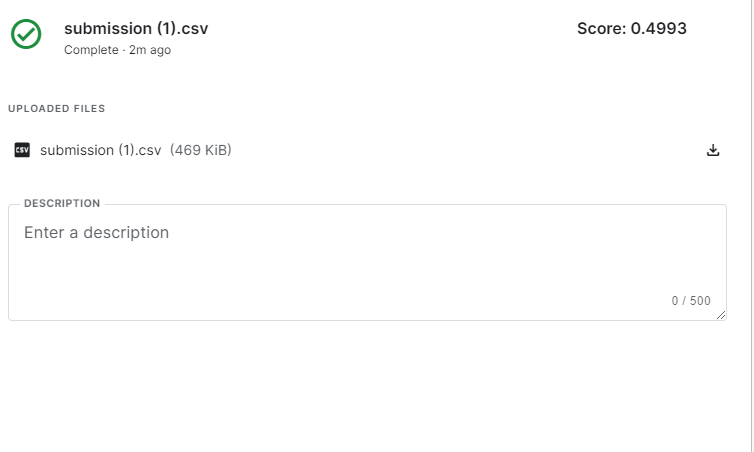

# **Version 3**

Using Decission Tree Regressor from Scikit-Learn to decompose Seasonality and Trend. Then, I trained a XGBRegressor based on their residuals after decompposing the Seasonality and Trend.

MAD: 3956.195551908791, MSE: 22043724.4128344, MAPE: 0.38193662082490626


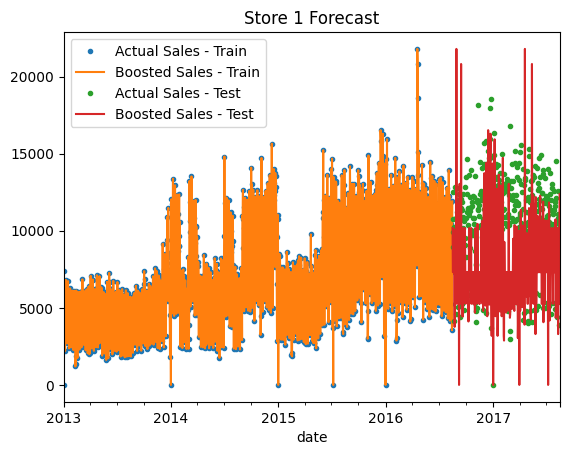

MAD: 4398.64548160989, MSE: 40891370.17917463, MAPE: 0.2806870951372715


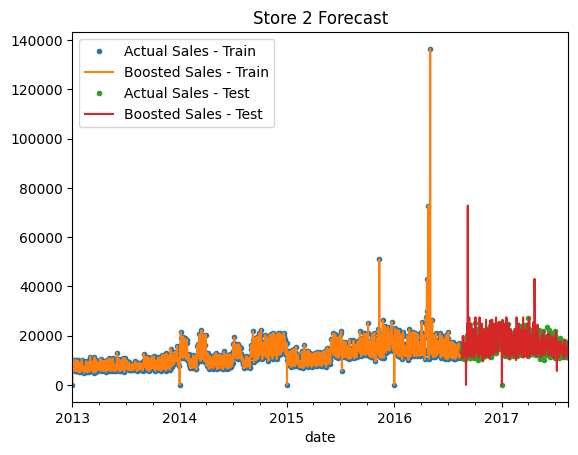

MAD: 7510.368709884616, MSE: 108268082.3991624, MAPE: 4.817457836924323e+17


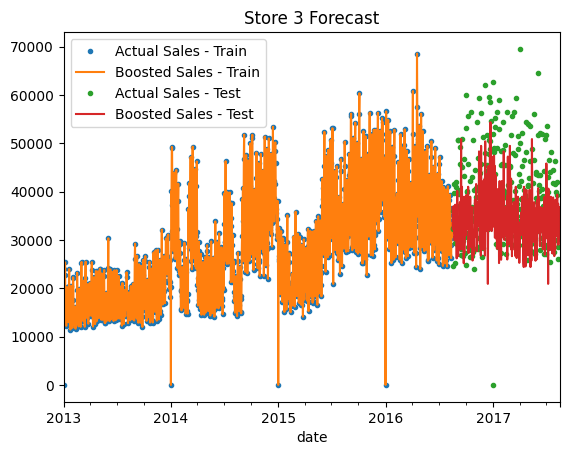

MAD: 3827.8250656098903, MSE: 22888545.775318053, MAPE: 0.27682164500738404


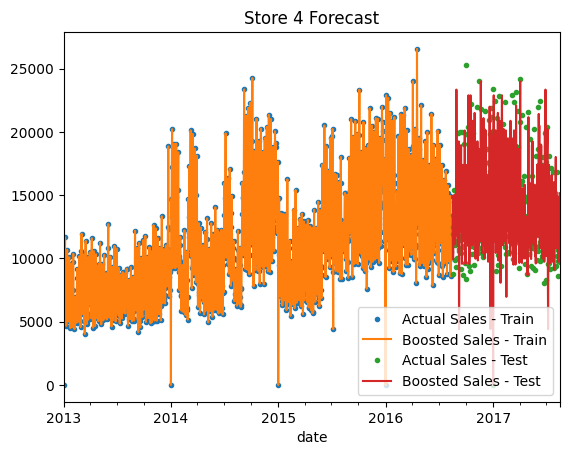

MAD: 1634.7063459472527, MSE: 4283865.63583207, MAPE: 0.16369199299163287


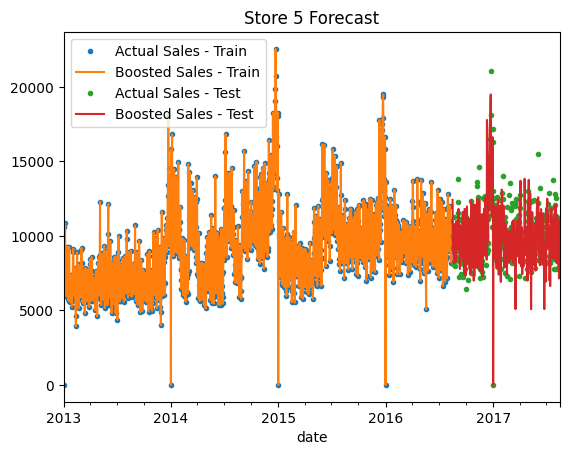

MAD: 5515.223831480769, MSE: 49832567.809071004, MAPE: 0.29167407035523224


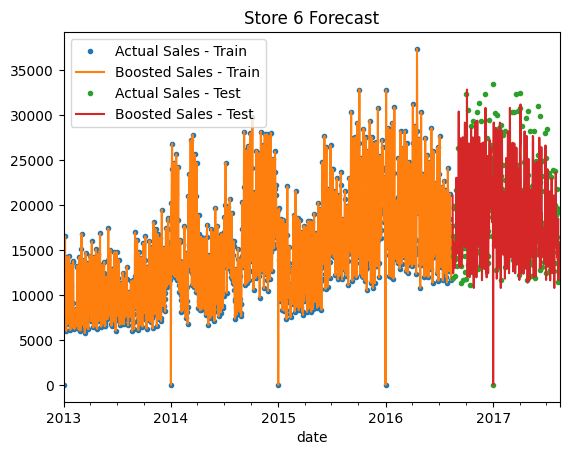

MAD: 3006.0504532554946, MSE: 15490336.157994453, MAPE: 0.1435022054500882


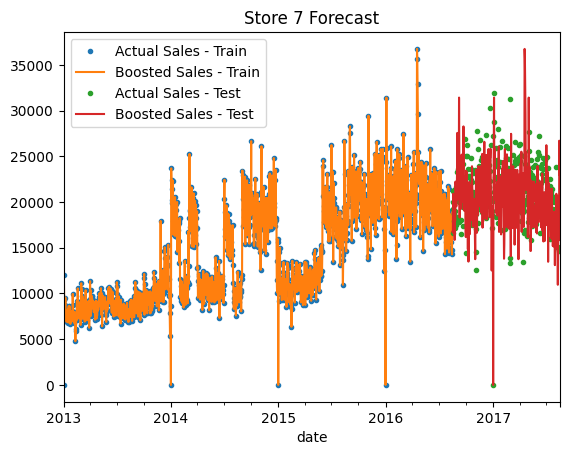

MAD: 5334.731013467032, MSE: 49856469.202364765, MAPE: 3.6431092190952646e+17


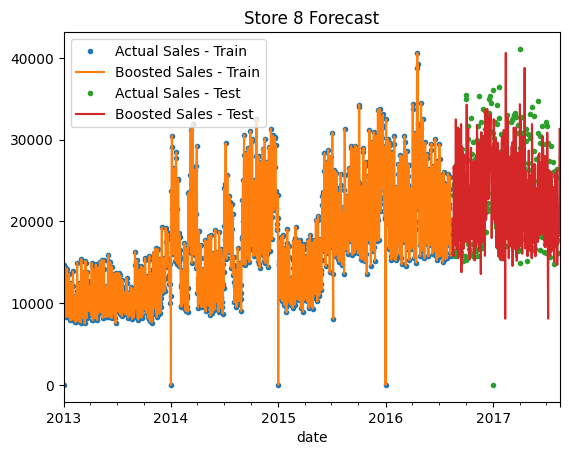

MAD: 5245.6450544010995, MSE: 52563601.45169517, MAPE: 0.25353647651540745


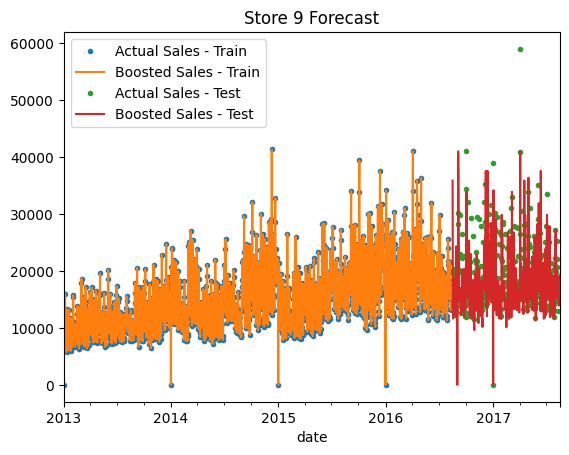

MAD: 1317.9524066016484, MSE: 3538103.3966468745, MAPE: 1.0938210388924459e+17


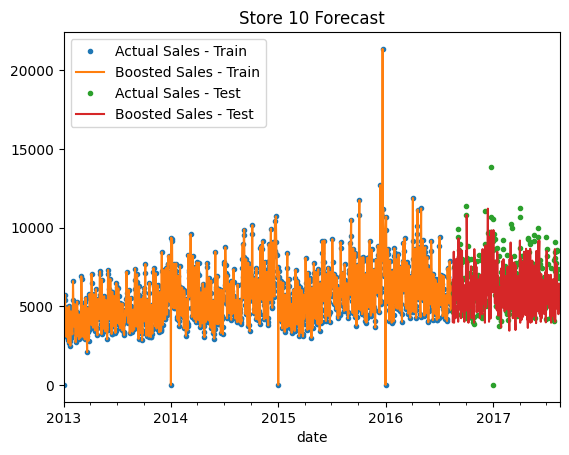

MAD: 4052.5419189807694, MSE: 28768904.267042857, MAPE: 0.1905606727826916


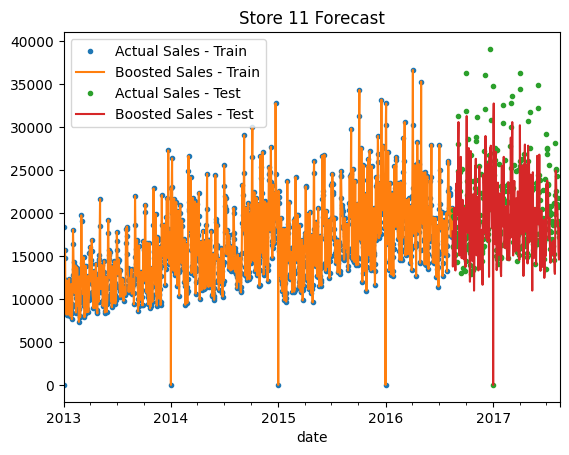

MAD: 1676.4575795054943, MSE: 5704881.56840517, MAPE: 0.2099710170917955


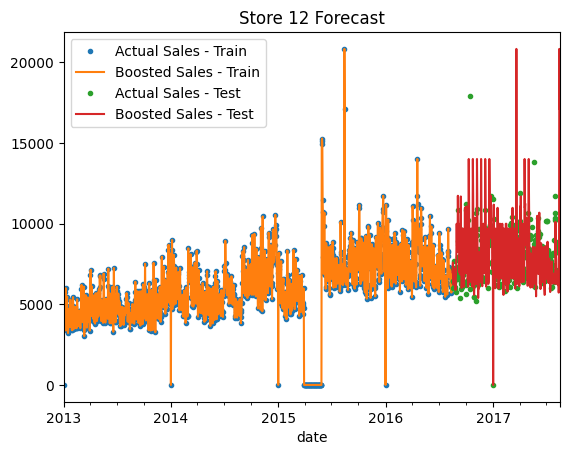

MAD: 1914.996139991758, MSE: 6769344.149647076, MAPE: 0.27517073611160886


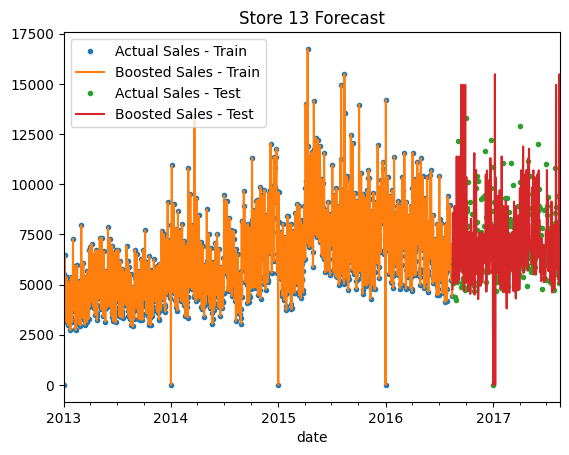

MAD: 1851.8300176510986, MSE: 6673101.271686454, MAPE: 1.615536825967246e+17


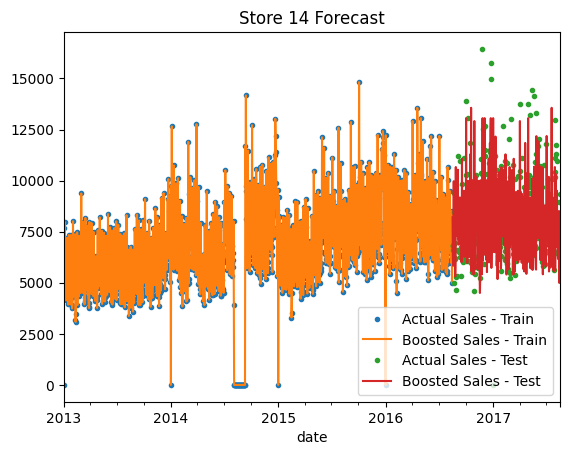

MAD: 1252.1502769175825, MSE: 2578292.5261725117, MAPE: 0.15197361681309732


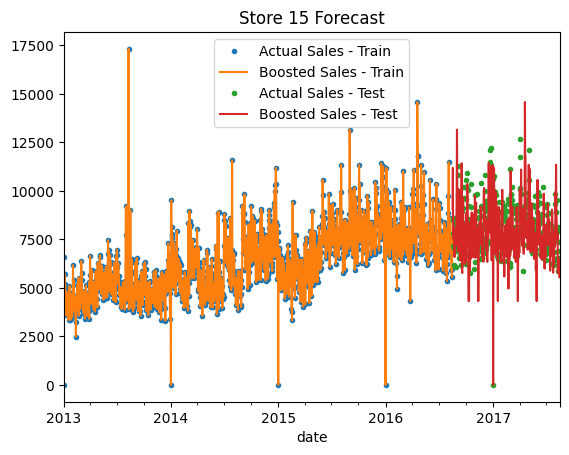

MAD: 1490.0213184725276, MSE: 4330069.096114261, MAPE: 0.23329871676833855


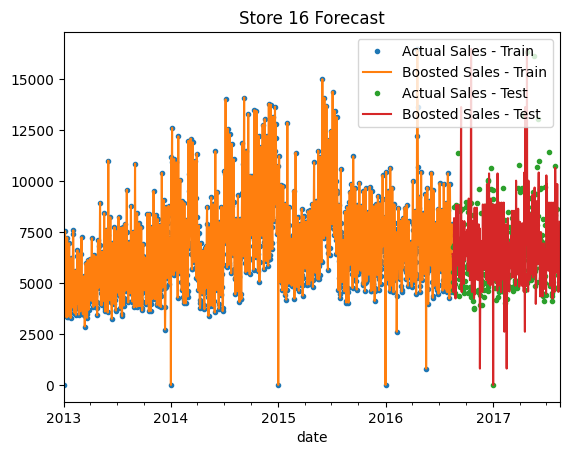

MAD: 3806.6513338186815, MSE: 23590696.536428735, MAPE: 2.5116890621269702e+17


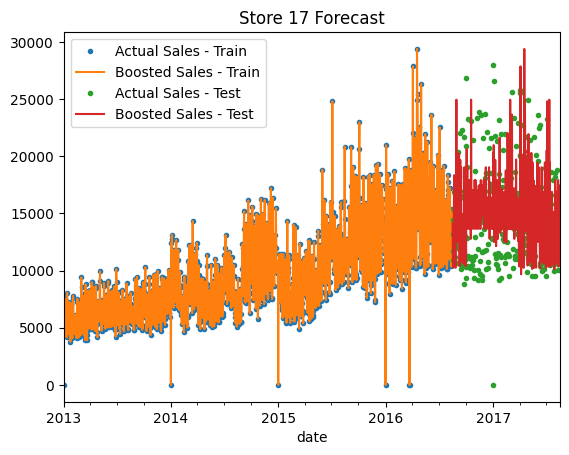

MAD: 5618.066272411814, MSE: 49224118.08765009, MAPE: 1.317033536123653e+19


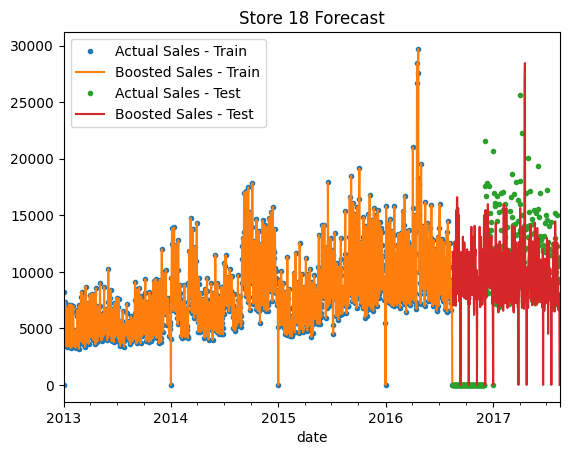

MAD: 2080.392571263736, MSE: 8697527.689977653, MAPE: 1.8426534789008048e+17


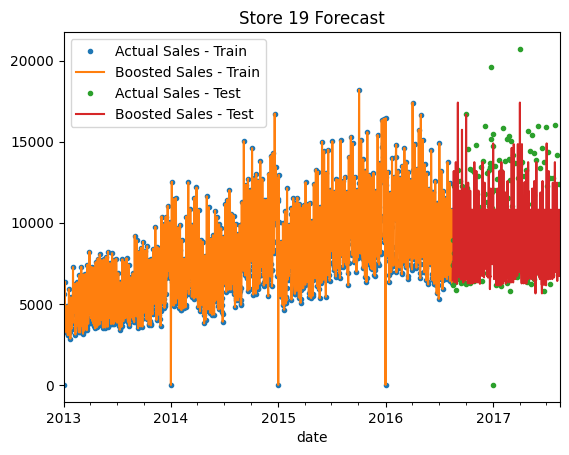

MAD: 6361.352931618131, MSE: 99315078.89908063, MAPE: 2.7086726743449565e+17


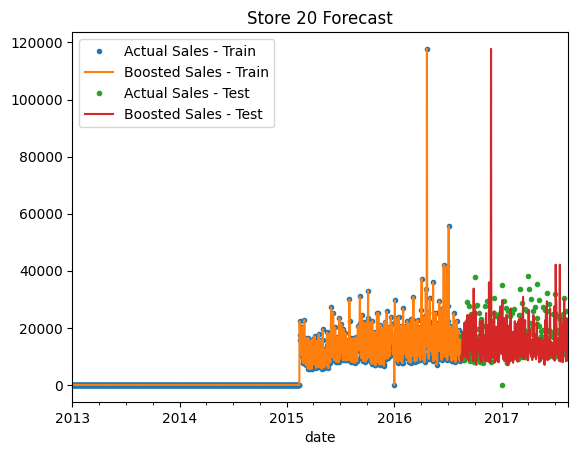

MAD: 4496.662163090658, MSE: 35501596.57060313, MAPE: 0.34101682868105615


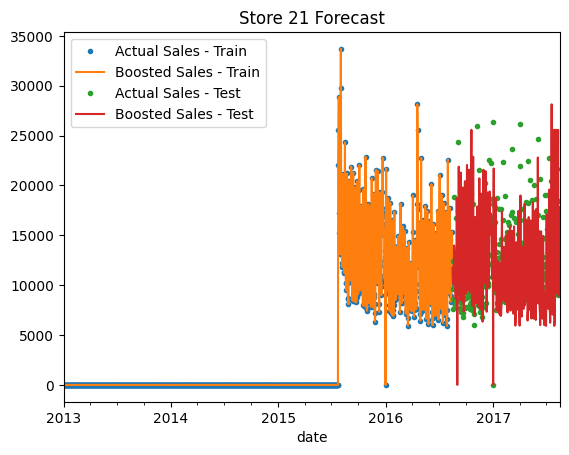

MAD: 1558.0632178653843, MSE: 4059713.6717258156, MAPE: 0.22912526849970696


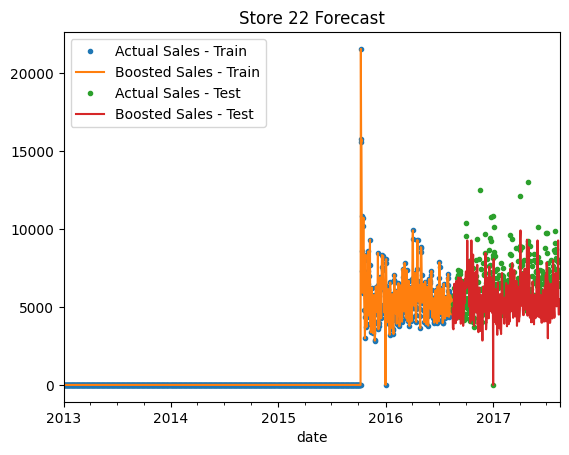

MAD: 1258.2517927898355, MSE: 2579376.890347181, MAPE: 0.14531130462264194


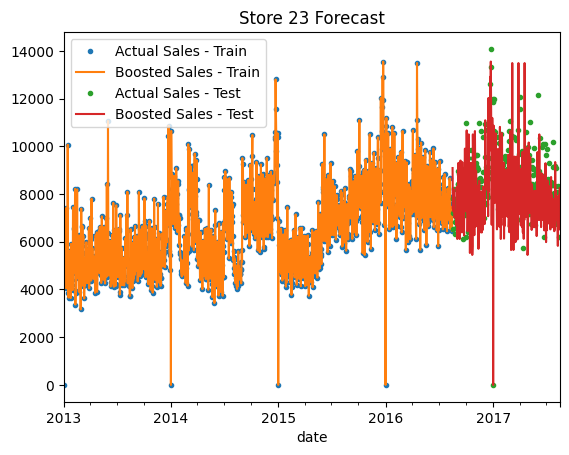

MAD: 3566.6454377266487, MSE: 25419610.773090616, MAPE: 0.19775715941632427


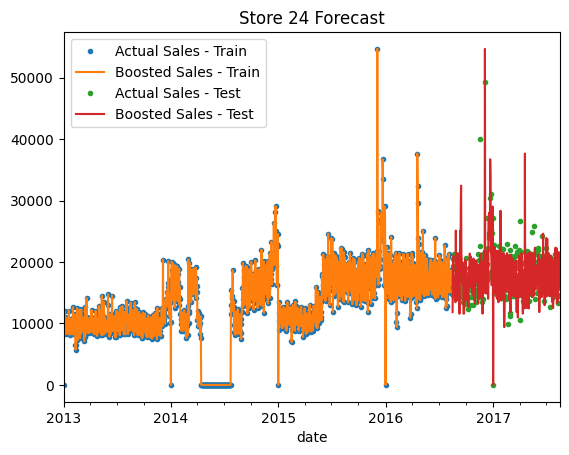

MAD: 5749.93098565522, MSE: 77122951.98871392, MAPE: 1.207207817747356e+19


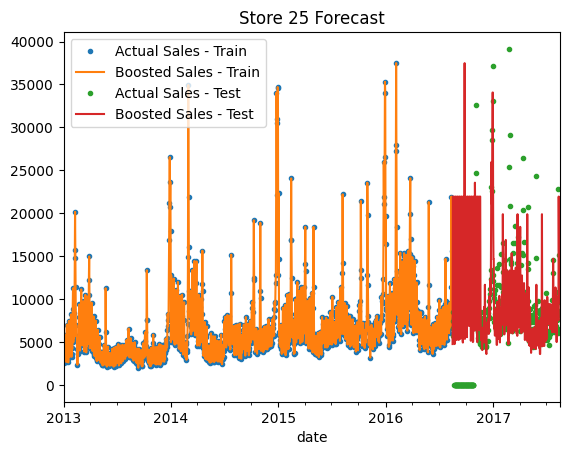

MAD: 1779.2822549052198, MSE: 8795786.34221398, MAPE: 0.32390186789120395


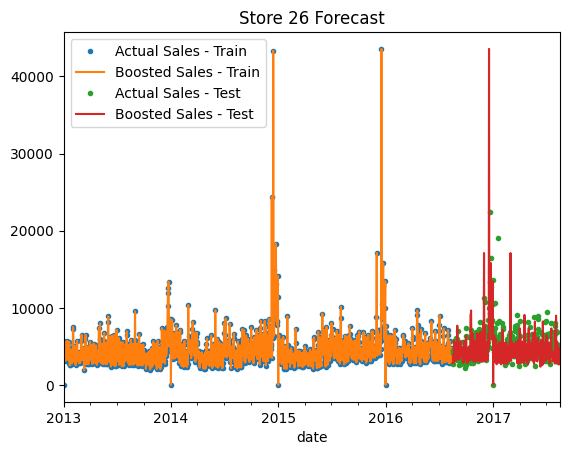

MAD: 3830.6587356799455, MSE: 28267592.87908657, MAPE: 0.24550021931065283


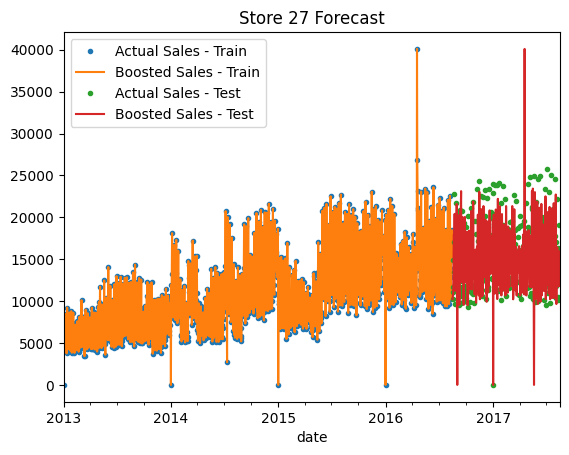

MAD: 4192.003947087913, MSE: 31464036.473493, MAPE: 1.8652074810896237e+17


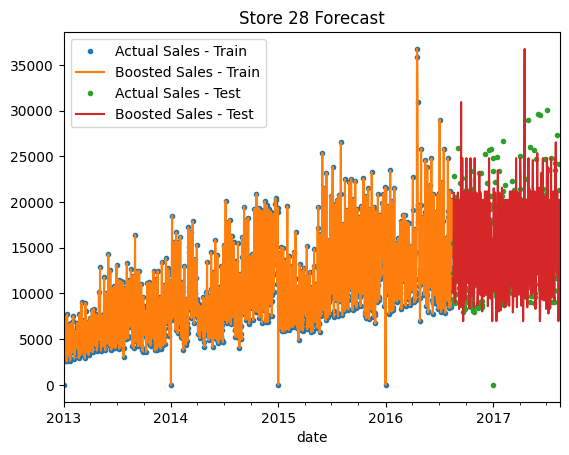

MAD: 3540.3536060879123, MSE: 23709486.0911902, MAPE: 1.3683772988129218e+17


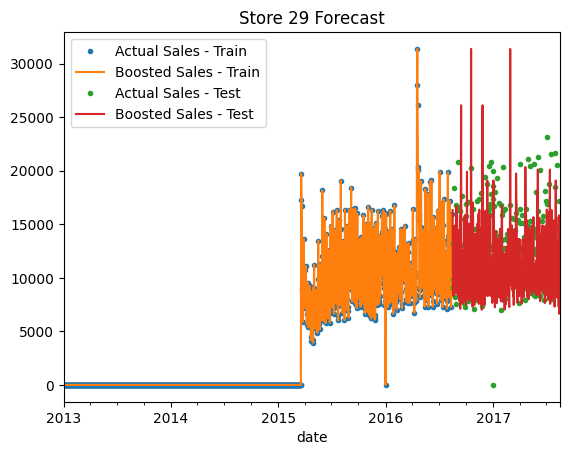

MAD: 1363.7591407115387, MSE: 4067646.820934188, MAPE: 0.26750069177913655


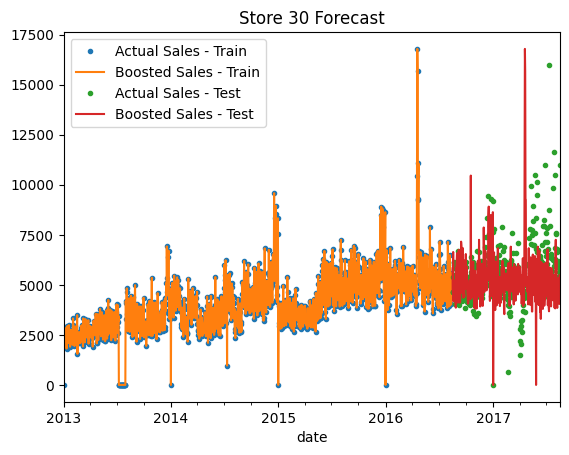

MAD: 3087.1655466236266, MSE: 15004701.278377308, MAPE: 0.23815009691874087


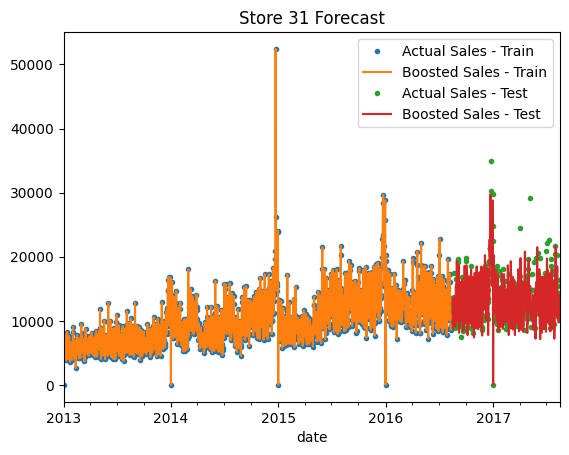

MAD: 1333.0558710329672, MSE: 6457615.248817203, MAPE: 0.23231443721605052


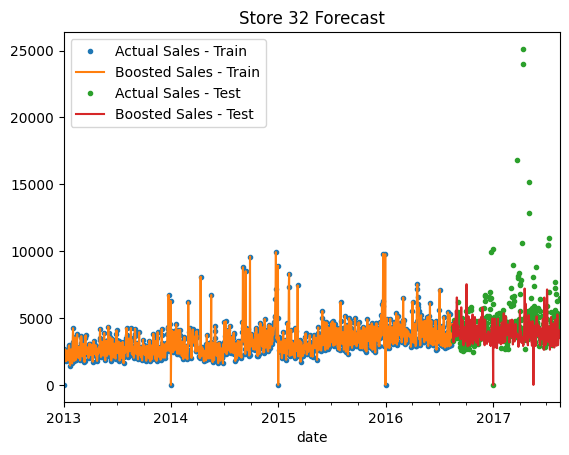

MAD: 2119.581962868132, MSE: 7484926.083190749, MAPE: 0.2191064289997883


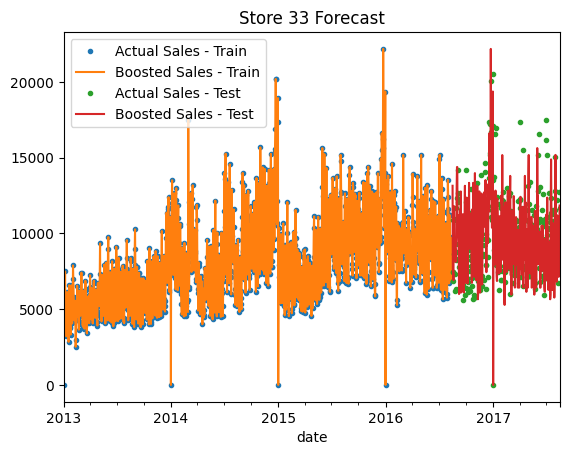

MAD: 1867.8418344120882, MSE: 6168225.278021902, MAPE: 0.16389890257737835


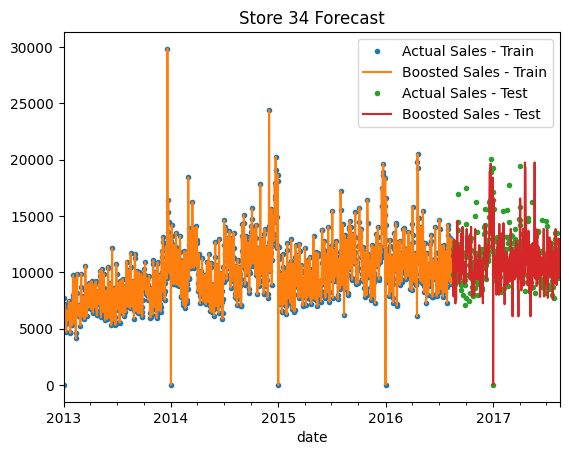

MAD: 1494.5142860508245, MSE: 5837231.1045487, MAPE: 0.257404194677227


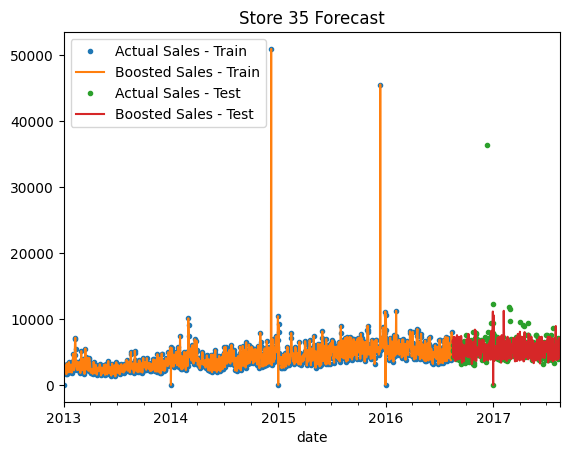

MAD: 2809.2375601923077, MSE: 12260190.824814115, MAPE: 0.2369996805807763


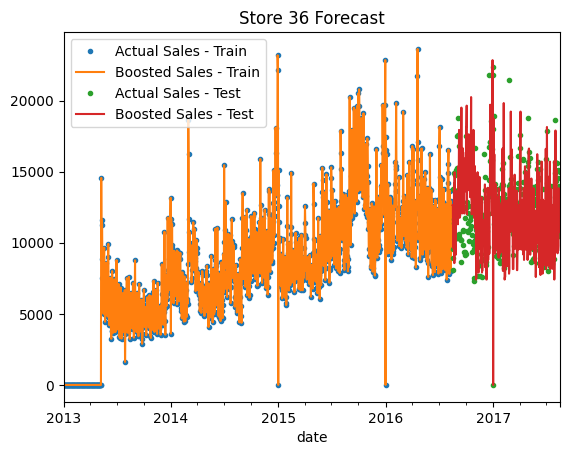

MAD: 2437.9883393230766, MSE: 9814106.359350275, MAPE: 0.17328862348835916


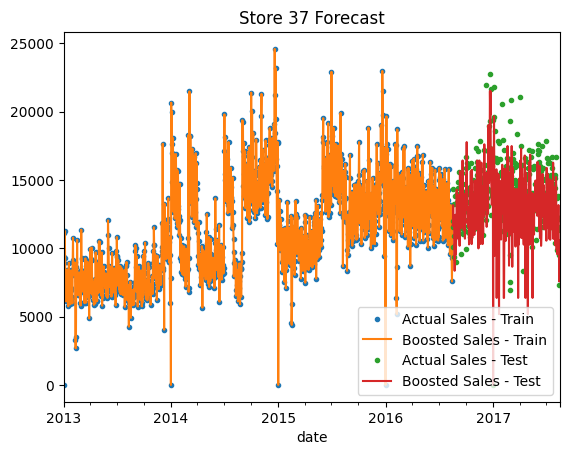

MAD: 3934.199842435715, MSE: 25318907.070517812, MAPE: 0.28525835435224206


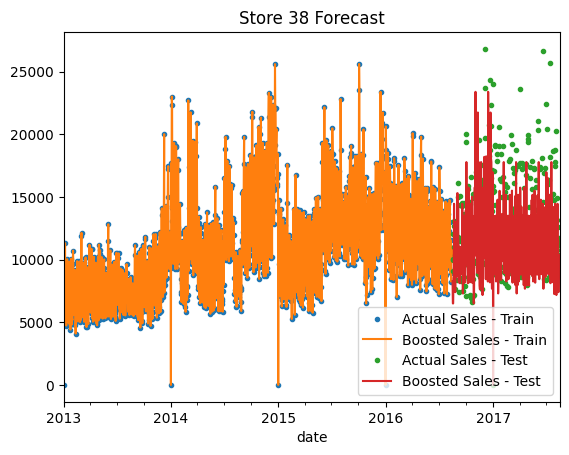

MAD: 4401.309396945055, MSE: 51821510.40265932, MAPE: 2.7782698677732723e+17


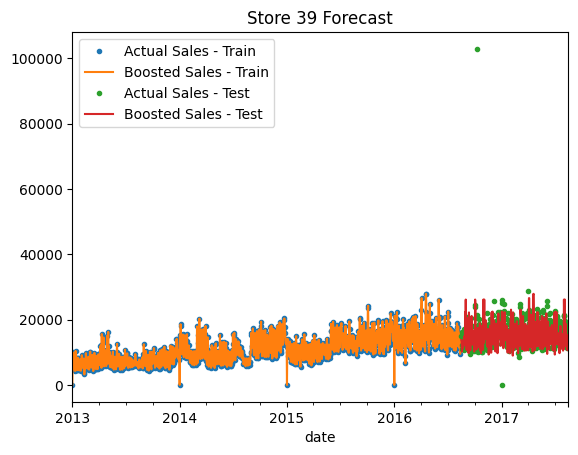

MAD: 3090.432900321429, MSE: 16792185.03265632, MAPE: 0.19532626854230908


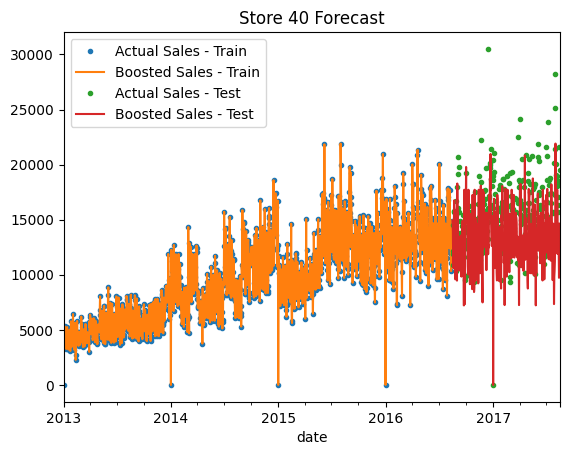

MAD: 3747.2176394233516, MSE: 21597155.61931352, MAPE: 0.28636558694986874


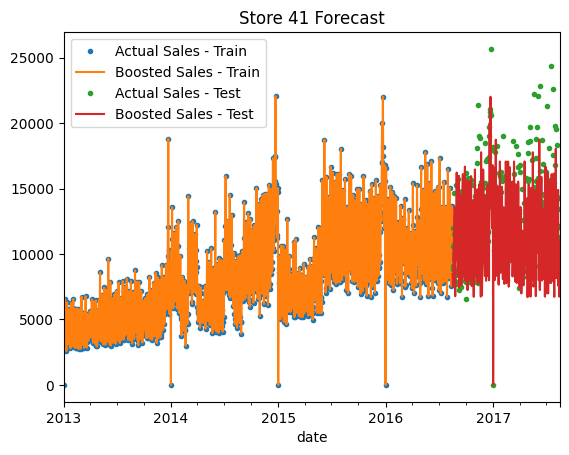

MAD: 3208.073639267033, MSE: 18650177.08614648, MAPE: 2.0732919714880205e+17


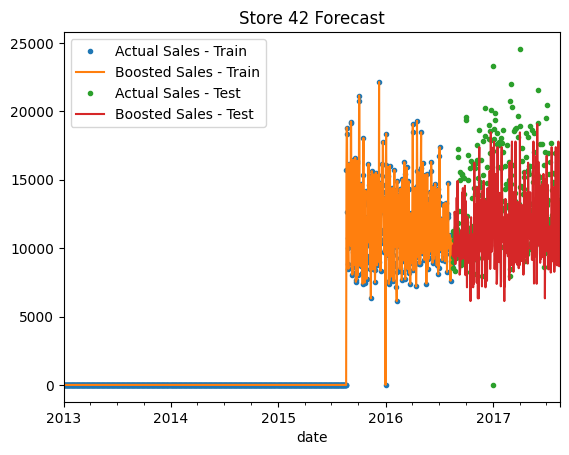

MAD: 3896.5111581401093, MSE: 25388458.081592202, MAPE: 4.491014169122865e+17


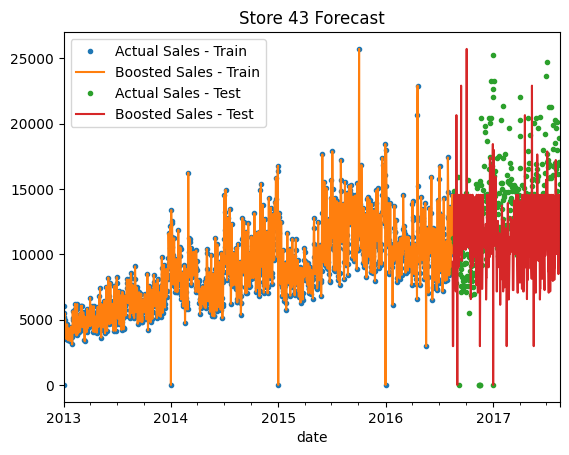

MAD: 10863.59421906868, MSE: 221498770.75653857, MAPE: 8.954292228316342e+17


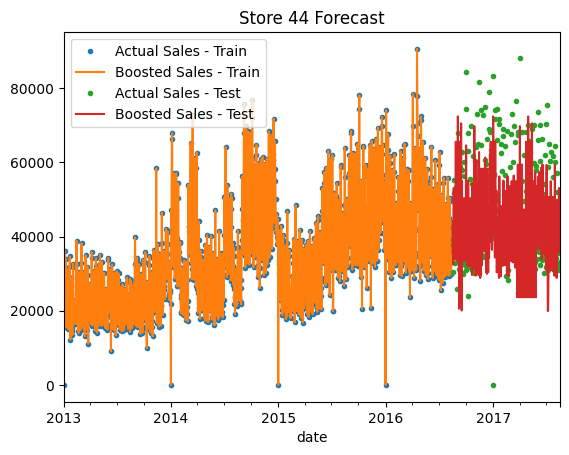

MAD: 12065.753197489012, MSE: 242028234.3178114, MAPE: 6.773980503751087e+17


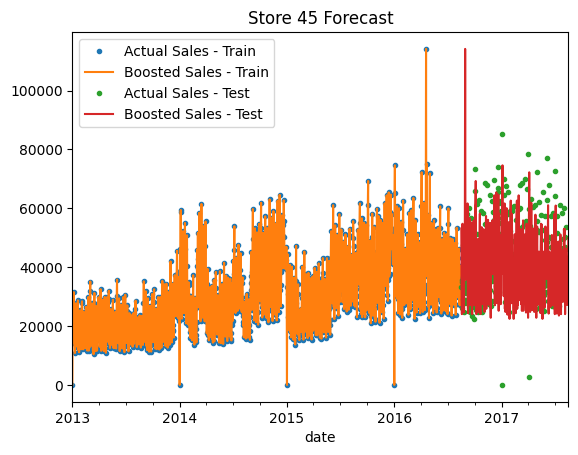

MAD: 10038.953960629122, MSE: 181458061.42890435, MAPE: 0.2893939441783135


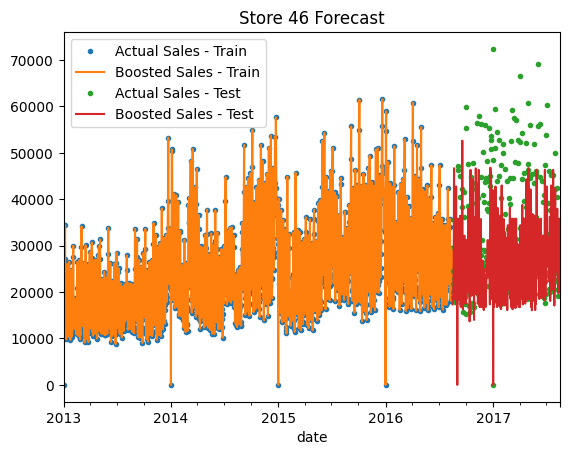

MAD: 12588.994173362638, MSE: 257542065.5570224, MAPE: 0.3047260399886707


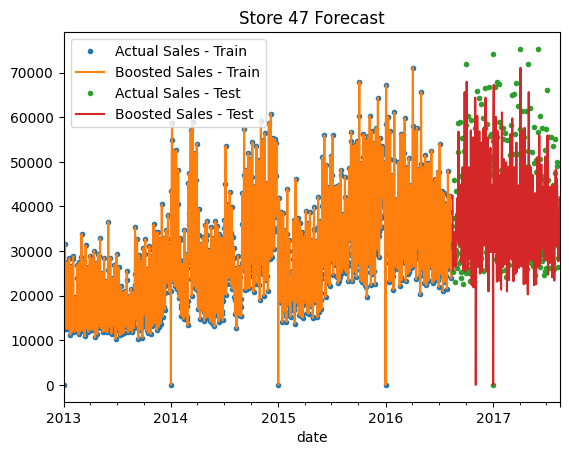

MAD: 9214.730341876373, MSE: 153108086.9132712, MAPE: 0.37107557373882305


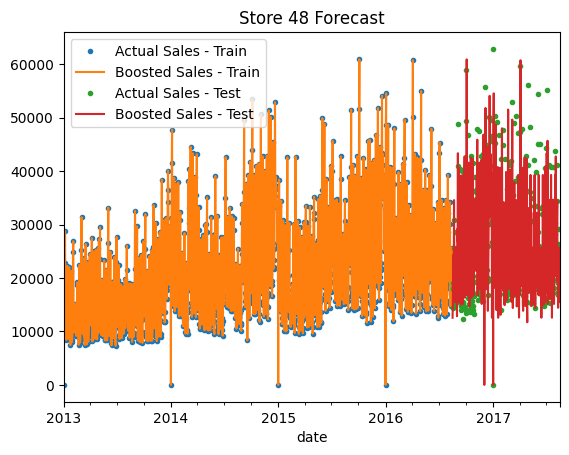

MAD: 7788.83327706868, MSE: 100267592.46423051, MAPE: 4.85081305396061e+17


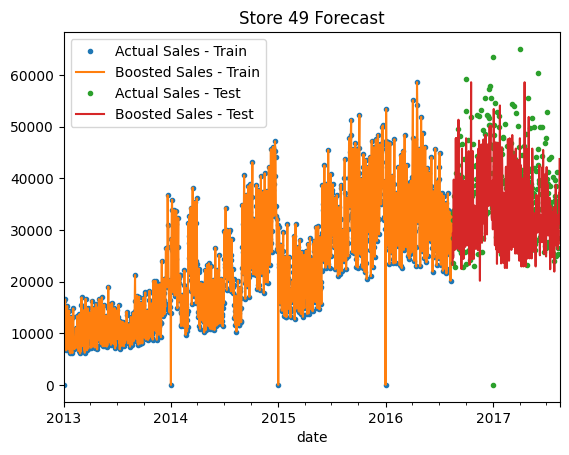

MAD: 5060.114669544781, MSE: 45830132.39912921, MAPE: 2.8474425598191286e+17


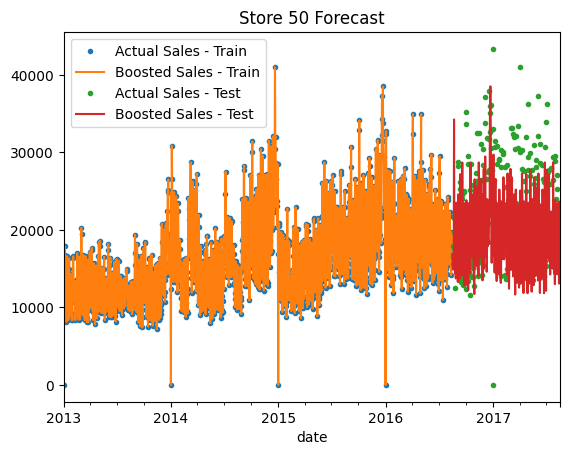

MAD: 5183.596332579671, MSE: 42498938.17080184, MAPE: 0.23459629621277667


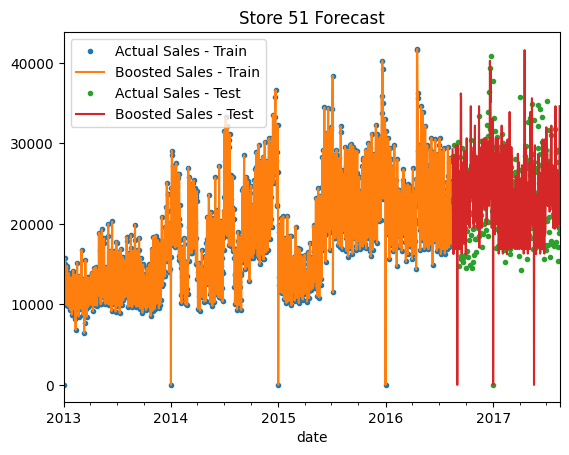

MAD: 7407.059706728021, MSE: 177474181.47110802, MAPE: 0.3241758241758242


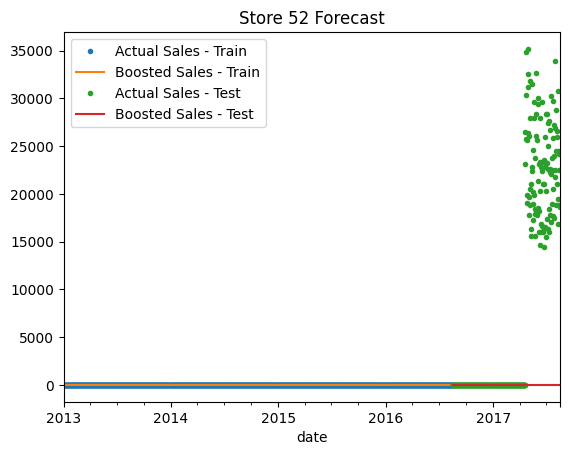

MAD: 4876.22904617033, MSE: 39932853.6713302, MAPE: 2.2488623284557693e+17


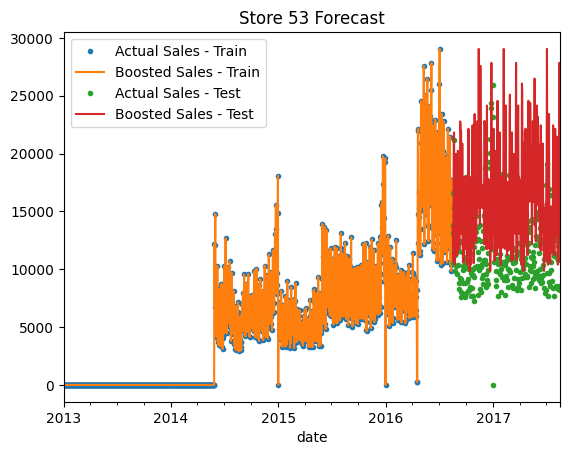

MAD: 2658.128205675824, MSE: 13399382.751125071, MAPE: 1.4333682006443416e+17


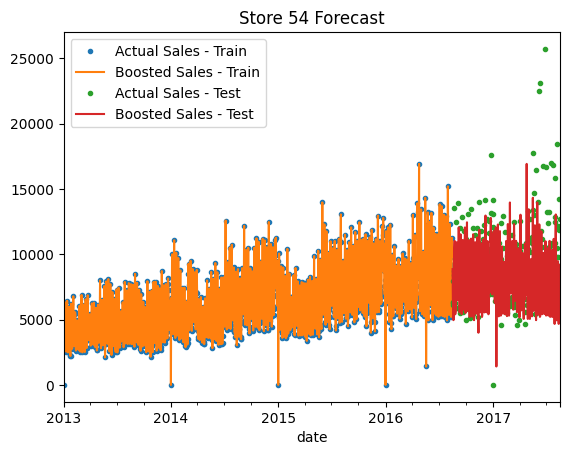

In [ ]:
import sklearn.tree

store_list = stores[['store_nbr']].drop_duplicates()
dateRange = train[['date']].drop_duplicates()
fourier = CalendarFourier(freq = 'A', order = 52)

for index, row in store_list[['store_nbr']].iterrows():
    storeData = stores_train[stores_train['store_nbr'] == row['store_nbr']][['date', 'cluster', 'sales']].groupby('date').sum()
    storeData = storeData.to_period('D')


    dp = DeterministicProcess(
        index = storeData.index,
        seasonal = True,
        additional_terms = [fourier],
        drop = True,
        constant = True,
        order = 1,
    )
    X = dp.in_sample()

    x_train, x_test = X.loc['2013-01-01':'2016-08-15'], X.loc['2016-08-16':]
    y_train, y_test = storeData[['sales']].loc['2013-01-01' : '2016-08-15', 'sales'], storeData[['sales']].loc['2016-08-16':,'sales']


    # model = LinearRegression(fit_intercept = False).fit(x_train, y_train)

    model = sklearn.tree.DecisionTreeRegressor().fit(x_train, y_train)

    y_fit = pd.Series(model.predict(x_train), index = x_train.index)
    y_pred = pd.Series(model.predict(x_test), index = x_test.index)

    y_resid = y_train - y_fit

    xgb = XGBRegressor().fit(x_train, y_resid)
    y_fit_boosted = xgb.predict(x_train) + y_fit
    y_pred_boosted = xgb.predict(x_test) + y_pred

    mad = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print(f'MAD: {mad}, MSE: {mse}, MAPE: {mape}')


    ax = y_train.plot(x = x_train, y = y_train, style = '.', label = 'Actual Sales - Train')
    ax = y_fit_boosted.plot(ax = ax, label = 'Boosted Sales - Train')
    ax = y_test.plot(x = x_test, y = y_test, style = '.', label = 'Actual Sales - Test')
    ax = y_pred_boosted.plot(ax = ax, label = 'Boosted Sales - Test')

    store_nbr = row['store_nbr']
    ax.set_title(f'Store {store_nbr} Forecast')
    plt.legend()
    plt.show()
